In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os

os.chdir("/content/drive/My Drive/MIMIC")
os.listdir("/content/drive/My Drive/MIMIC")

Mounted at /content/drive/


['Multi-Filter-Residual-Convolutional-Neural-Network',
 'LAAT',
 'LAAT_Run.ipynb',
 'Process_Data',
 'MResCNN_RUN.ipynb',
 'BERT_FineTune',
 'Transformer_MCP_1.ipynb',
 'Bert-Chinese-Text-Classification-Pytorch',
 'Transformer_MCP_3.ipynb',
 'caml-mimic',
 'MResCNN_RUN_2.ipynb',
 'CALM_RUN.ipynb',
 'Transformer_MCP_4.ipynb',
 'Transformer_MCP_2.ipynb',
 'FineTune_Visualization.ipynb',
 'mca_bert',
 'Does_Bert_Magic.ipynb',
 'Find_MN.ipynb',
 'transformersum',
 'Transformer_MCP_6_ClinicalBert + Heir.ipynb',
 'Transformer_MCP_7_longformer.ipynb',
 'Transformer_MCP_8_ClinicalBert512 + Heir.ipynb',
 'Transformer_MCP_5_Bert-based-model + Heir.ipynb',
 'Data_Augmentation_sub1.ipynb',
 'Data_Augmentation_sub3.ipynb',
 'Data_Augmentation_sub2.ipynb',
 'Data_Augmentation.ipynb',
 'Transformer_MCP_10_ClinicalBert512 + Heir + DataAug.ipynb',
 'Transformer_MCP_9_Bert-based-model + Heir + DataAug.ipynb']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,average_precision_score,PrecisionRecallDisplay
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [11]:
#加载数据
checkpoint_bert_trans = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base_heir/3BERT+2Transformer/checkpoint_epoch_11.pt",map_location=torch.device('cpu'))
checkpoint_bert_cnn = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base_heir/BERT3d+CNN/checkpoint_epoch_10.pt",map_location=torch.device('cpu'))
checkpoint_bert_dpcnn = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base_heir/BERT3d+DPCNN/checkpoint_epoch_12.pt",map_location=torch.device('cpu'))
checkpoint_bert_cnn_da = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base_heir/BERT3d+CNN+DA/checkpoint_epoch_7.pt",map_location=torch.device('cpu'))

checkpoint_clinical_bert_base = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_bert_512_heir/base/checkpoint_epoch_11.pt",map_location=torch.device('cpu'))
checkpoint_clinical_bert_trans = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_bert_512_heir/3Bert+2transformer/checkpoint_epoch_6.pt",map_location=torch.device('cpu'))
checkpoint_clinical_bert_dpcnn = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_bert_512_heir/Bert+DPCNN/checkpoint_epoch_11.pt",map_location=torch.device('cpu'))
checkpoint_clinical_bert_trans_da = torch.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_bert_512_heir/3Bert+stransformer+DA/checkpoint_epoch_7.pt",map_location=torch.device('cpu'))



# Loss Result
### 为了比较收敛的速度
### train loss , F1 , auc

### train loss

In [ ]:
# bert_based_model , epoch = 40
bert_train_loss_batch =  [0.3582300841808319, 0.33915674686431885, 0.32884204387664795, 0.37058115005493164, 0.3224171996116638, 0.32933834195137024, 0.3848635256290436, 0.31936150789260864, 0.3035721480846405, 0.37009382247924805, 0.26342037320137024, 0.31105726957321167, 0.28494545817375183, 0.2758050560951233, 0.23297318816184998, 0.22248141467571259, 0.30632907152175903, 0.22918130457401276, 0.2537911534309387, 0.22300593554973602, 0.24761149287223816, 0.2526766061782837, 0.22345973551273346, 0.22380006313323975, 0.24054720997810364, 0.24027717113494873, 0.24177131056785583, 0.25486794114112854, 0.26486673951148987, 0.25569018721580505, 0.23603877425193787, 0.29260173439979553, 0.2331305891275406, 0.24948987364768982, 0.28525036573410034, 0.28161120414733887, 0.1869617998600006, 0.23810096085071564, 0.2575872838497162, 0.19242607057094574, 0.25728175044059753, 0.20881213247776031, 0.25080499053001404, 0.24456794559955597, 0.22793994843959808, 0.21440336108207703, 0.21983930468559265, 0.20162908732891083, 0.19828134775161743, 0.2321569323539734, 0.20998747646808624, 0.19082984328269958, 0.18873265385627747, 0.18805968761444092, 0.18996429443359375, 0.17735671997070312, 0.21790969371795654, 0.17410778999328613, 0.24618884921073914, 0.245263934135437, 0.18192298710346222, 0.20300540328025818, 0.18897880613803864, 0.21055667102336884, 0.18521930277347565, 0.19633151590824127, 0.19710414111614227, 0.18371783196926117, 0.1654992699623108, 0.16736619174480438, 0.18744271993637085, 0.14605997502803802, 0.1585366129875183, 0.16584953665733337, 0.18267112970352173, 0.17433315515518188, 0.1597009003162384, 0.133339062333107, 0.1616332083940506, 0.1702241152524948, 0.17288367450237274, 0.1477665901184082, 0.1601433902978897, 0.1825065314769745, 0.14529332518577576, 0.18708926439285278, 0.1411411017179489, 0.14166423678398132, 0.15436451137065887, 0.09685131907463074, 0.12954571843147278, 0.13151279091835022, 0.1496080458164215, 0.13805043697357178, 0.1090170294046402, 0.12961533665657043, 0.1698085367679596, 0.13030241429805756, 0.14104481041431427, 0.16275689005851746, 0.15691038966178894, 0.14388877153396606, 0.1438058614730835, 0.14000137150287628, 0.1471160650253296, 0.18539977073669434, 0.13077040016651154, 0.16885294020175934, 0.11587342619895935, 0.11960252374410629, 0.10988795012235641, 0.1364075094461441, 0.1539546102285385, 0.1439312845468521, 0.13630403578281403, 0.1349051594734192, 0.1263793557882309, 0.12590424716472626, 0.0970408245921135, 0.13224364817142487, 0.13145875930786133, 0.11681949347257614, 0.12481291592121124, 0.11422126740217209, 0.13507753610610962, 0.13667644560337067, 0.09184429794549942, 0.11255881935358047, 0.0895397812128067, 0.10717644542455673, 0.11703937500715256, 0.12773774564266205, 0.11404429376125336, 0.09418073296546936, 0.14790259301662445, 0.11222417652606964, 0.07518544793128967, 0.09664090722799301, 0.07753024250268936, 0.09856517612934113, 0.1033276915550232, 0.1265135109424591, 0.10116779804229736, 0.126851886510849, 0.08625181019306183, 0.09759283810853958, 0.10812297463417053, 0.0963716134428978, 0.11276029050350189, 0.10760890692472458, 0.09891145676374435, 0.0760626494884491, 0.08367495983839035, 0.08025556057691574, 0.07696770876646042, 0.08906793594360352, 0.07934705168008804, 0.08695466816425323, 0.08208407461643219, 0.1191563755273819, 0.08842732012271881, 0.09460476040840149, 0.07384563237428665, 0.10102731734514236, 0.09669311344623566, 0.08184011280536652, 0.0832354724407196, 0.08625718951225281, 0.10202740132808685, 0.07694698125123978, 0.08226694911718369, 0.07592400163412094, 0.06789205223321915, 0.07957183569669724, 0.07210404425859451, 0.05546588823199272, 0.06870587915182114, 0.07780178636312485, 0.08602485805749893, 0.08376030623912811, 0.07454051822423935, 0.07269477099180222, 0.07653280347585678, 0.06112365052103996, 0.07575879991054535, 0.07231728732585907, 0.06444160640239716, 0.0538194440305233, 0.0782320499420166, 0.07692833989858627, 0.07964452356100082, 0.06421582400798798, 0.04686470329761505, 0.05120221897959709, 0.04668553173542023, 0.0543394461274147, 0.07040660083293915, 0.08524854481220245, 0.058693502098321915, 0.06958489865064621, 0.05708673223853111, 0.04938626289367676, 0.05035567656159401, 0.06851448118686676, 0.047616370022296906, 0.04726731777191162, 0.04878220334649086, 0.05495468154549599, 0.04613424092531204, 0.04328630492091179, 0.05085185915231705, 0.045272696763277054, 0.046647872775793076, 0.05725044012069702, 0.05824116989970207, 0.05682747811079025, 0.06765890121459961, 0.0458114929497242, 0.04053594544529915, 0.06484383344650269, 0.03738473728299141, 0.035999979823827744, 0.07409808784723282, 0.040397755801677704, 0.05024062842130661, 0.03401164337992668, 0.049341000616550446, 0.04684162884950638, 0.0407942458987236, 0.035941239446401596, 0.04283759370446205, 0.03126053884625435, 0.03003968857228756, 0.04419371485710144, 0.044351089745759964, 0.0417938232421875, 0.035231512039899826, 0.025949649512767792, 0.046765200793743134, 0.040951184928417206]

# clinical-bert model , epcoh = 40 
clinical_train_loss_batch = [0.4493981599807739, 0.37036803364753723, 0.2966119647026062, 0.3442932963371277, 0.34764862060546875, 0.3178746998310089, 0.3314909338951111, 0.26939570903778076, 0.3275986313819885, 0.30131250619888306, 0.3056233823299408, 0.308064728975296, 0.3441006541252136, 0.30300426483154297, 0.2650124132633209, 0.279882550239563, 0.3064998686313629, 0.26751232147216797, 0.25848355889320374, 0.26968368887901306, 0.311849981546402, 0.29171961545944214, 0.2793563902378082, 0.23641955852508545, 0.2826385498046875, 0.2750900685787201, 0.2999466359615326, 0.24363330006599426, 0.230411559343338, 0.26941752433776855, 0.25675681233406067, 0.26155102252960205, 0.25759124755859375, 0.2380089908838272, 0.2752399146556854, 0.2595592737197876, 0.2643592655658722, 0.22474326193332672, 0.24961978197097778, 0.22706973552703857, 0.265129029750824, 0.22591999173164368, 0.2221844643354416, 0.21755076944828033, 0.23733168840408325, 0.21341128647327423, 0.19150394201278687, 0.22854606807231903, 0.23868529498577118, 0.20863567292690277, 0.23418721556663513, 0.1997034102678299, 0.18711386620998383, 0.23982030153274536, 0.20085127651691437, 0.2070699781179428, 0.24506926536560059, 0.1792808324098587, 0.22219550609588623, 0.22564543783664703, 0.22613826394081116, 0.20593152940273285, 0.2283354550600052, 0.211893692612648, 0.2227500081062317, 0.20890475809574127, 0.18828323483467102, 0.2156635969877243, 0.22943228483200073, 0.20042161643505096, 0.2175237089395523, 0.20768168568611145, 0.16896724700927734, 0.18717585504055023, 0.20391440391540527, 0.17505380511283875, 0.19797825813293457, 0.18592551350593567, 0.1972593069076538, 0.19057078659534454, 0.21303312480449677, 0.20771197974681854, 0.18744361400604248, 0.22063663601875305, 0.190524160861969, 0.16120006144046783, 0.15288768708705902, 0.17845657467842102, 0.18079525232315063, 0.17413274943828583, 0.14166578650474548, 0.19318096339702606, 0.19354084134101868, 0.17872586846351624, 0.17204931378364563, 0.1867407113313675, 0.1717119961977005, 0.17650794982910156, 0.17936347424983978, 0.1712043136358261, 0.13816770911216736, 0.1654897779226303, 0.15540513396263123, 0.17864146828651428, 0.17284038662910461, 0.15573953092098236, 0.14244060218334198, 0.1738944947719574, 0.15754260122776031, 0.17482861876487732, 0.16405217349529266, 0.15519259870052338, 0.18722482025623322, 0.17115817964076996, 0.13694868981838226, 0.12917041778564453, 0.16817060112953186, 0.14709614217281342, 0.16971637308597565, 0.13739997148513794, 0.12470443546772003, 0.14882878959178925, 0.12440845370292664, 0.123316191136837, 0.14024731516838074, 0.16967521607875824, 0.1474895477294922, 0.17396274209022522, 0.13166168332099915, 0.155582994222641, 0.16024406254291534, 0.13491345942020416, 0.14674219489097595, 0.13191533088684082, 0.1480053812265396, 0.15237194299697876, 0.15990222990512848, 0.1409512460231781, 0.12855204939842224, 0.13716502487659454, 0.12983368337154388, 0.1273375153541565, 0.1310988962650299, 0.12961122393608093, 0.1251171976327896, 0.12789875268936157, 0.1297210454940796, 0.11150994896888733, 0.13604243099689484, 0.14437350630760193, 0.12385079264640808, 0.12741194665431976, 0.12038364261388779, 0.12736687064170837, 0.11105779558420181, 0.12549766898155212, 0.10487353056669235, 0.11424463242292404, 0.1192161813378334, 0.11312360316514969, 0.12567560374736786, 0.09288687258958817, 0.09313934296369553, 0.11089497059583664, 0.09371598809957504, 0.11695637553930283, 0.10165713727474213, 0.10245467722415924, 0.10576357692480087, 0.09967038780450821, 0.13213807344436646, 0.09694574773311615, 0.11028364300727844, 0.1329755187034607, 0.08784393966197968, 0.1026138886809349, 0.09203621745109558, 0.10383688658475876, 0.11662285774946213, 0.1032460406422615, 0.10579808801412582, 0.10164982825517654, 0.08754962682723999, 0.0908345878124237, 0.09810895472764969, 0.08134141564369202, 0.08531025052070618, 0.07928250730037689, 0.10018674284219742, 0.10391860455274582, 0.09789538383483887, 0.0933416336774826, 0.10540049523115158, 0.09527402371168137, 0.08905486762523651, 0.08543233573436737, 0.11425920575857162, 0.08548026531934738, 0.07829226553440094, 0.09637895971536636, 0.06758788973093033, 0.06621836870908737, 0.06965788453817368, 0.08220789581537247, 0.07478799670934677, 0.06497984379529953, 0.0725238099694252, 0.08062002807855606, 0.0702490508556366, 0.08372291177511215, 0.06908328831195831, 0.0677117258310318, 0.08383508771657944, 0.07779408991336823, 0.06252110004425049, 0.06685590744018555, 0.06735341995954514, 0.07112912088632584, 0.07158885896205902, 0.08315608650445938, 0.06720992922782898, 0.06924055516719818, 0.0502169169485569, 0.08934610337018967, 0.07585303485393524, 0.07815127819776535, 0.06373873353004456, 0.08555454760789871, 0.07241159677505493, 0.07209879904985428, 0.05419193208217621, 0.06515641510486603, 0.060866039246320724, 0.06389035284519196, 0.06830248981714249, 0.06013660132884979, 0.07087855786085129, 0.04776638001203537, 0.05534480884671211, 0.06612122058868408]

# Clinical-Longformer , epoch = 10
clinicallong_train_loss_batch = [0.36095550656318665, 0.31625786423683167, 0.4159395396709442, 0.09366349130868912, 0.5855287909507751, 0.1792965829372406, 0.32621291279792786, 0.39971408247947693, 0.17482246458530426, 0.3923552334308624, 0.43108904361724854, 0.19288882613182068, 0.5955266952514648, 0.06005917489528656, 0.18983012437820435, 0.23293858766555786, 0.15553949773311615, 0.23634816706180573, 0.2668243646621704, 0.020944520831108093, 0.26412177085876465, 0.14742377400398254, 0.2813918888568878, 0.0987168401479721, 0.09021773934364319, 0.02223304845392704, 0.04760140925645828, 0.27912479639053345, 0.20716892182826996, 0.2159881740808487, 0.22192835807800293, 0.18523196876049042, 0.12344454228878021, 0.07805703580379486, 0.24451160430908203, 0.09925999492406845, 0.08790118992328644, 0.17109261453151703, 0.10234105587005615, 0.06761138886213303, 0.24145783483982086, 0.4680027961730957, 0.1570049375295639, 0.13551068305969238, 0.11524226516485214, 0.282651424407959, 0.04844506084918976, 0.3327315151691437, 0.25561386346817017, 0.14550118148326874, 0.27473583817481995, 0.08314977586269379, 0.179523304104805, 0.05286698043346405, 0.29656630754470825, 0.05241221934556961, 0.23992030322551727, 0.21672599017620087, 0.06449025124311447, 0.08638415485620499]


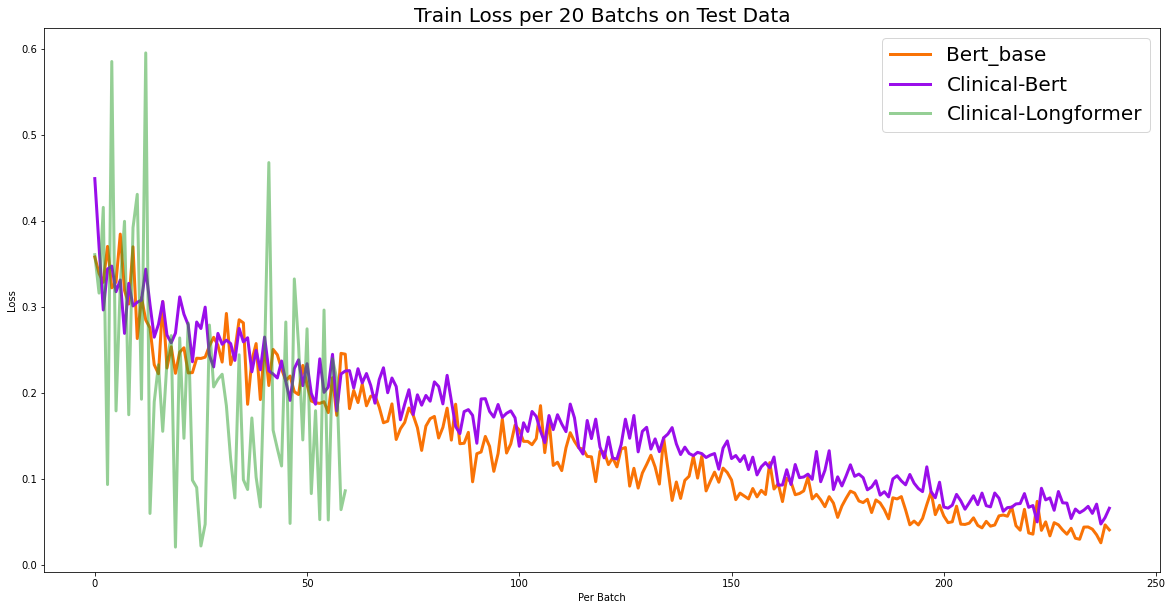

In [ ]:
# 打印损失函数
fig, axs = plt.subplots(figsize=(20, 10))
############# 可视化 train_loss_batch ########################
# 打印 BERT-base 的 train_loss_batch 
axs.plot( np.arange(0,len(bert_train_loss_batch),1),
             np.array(bert_train_loss_batch),
            label="Bert_base",
            color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
            #linestyle=":",
            linewidth=3,)
# 打印 Clinical-BERT 的 train_loss_bacth
axs.plot( np.arange(0,len(clinical_train_loss_batch),1), # 打印 Clinical-BERT 的 train_loss_batch 
             np.array(clinical_train_loss_batch),
            label="Clinical-Bert",
            color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
            #linestyle=":",
            linewidth=3)
# 打印 Clinical-Longformer-BERT 的 train_loss_bacth
axs.plot( np.arange(0,len(clinicallong_train_loss_batch),1), # 打印 Clinical-Longformer-BERT 的 train_loss_batch 
             np.array(clinicallong_train_loss_batch),
            label="Clinical-Longformer",
            color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
            #linestyle=":",
            linewidth=3,
            alpha = 0.5)
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
axs.set_xlabel("Per Batch")
axs.set_ylabel("Loss")
axs.set_title("Train Loss per 20 Batchs on Test Data" , fontsize = 20)
axs.legend(fontsize = 20)

plt.show()
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/train_loss_per_batch.png")

### F1

In [102]:
# Bert_Based Model F1 , epoch = 12
bert_macro_f1 = [0.05476610929171194, 0.14328066657326805, 0.1700255364013868, 0.21459085040277612, 0.23541167872476856, 0.2866429183391283, 0.3121946872075289, 0.3393579996787951, 0.3644635762869, 0.3763166230449109, 0.37791883563528816, 0.3829451484841607, 0.3967304589204902, 0.39992318335863347, 0.3901952908934883, 0.42110086838154775, 0.4206655918377713, 0.41968564111441314, 0.43743401161732537, 0.44016110123268154, 0.4457279408613236, 0.44767341603479216, 0.4449897518818898, 0.45136942992948614, 0.4501876999768133, 0.44881118270053827, 0.452670580322453, 0.45480754807825263, 0.454154213044985, 0.4523407506962421, 0.45230940385313667, 0.4474738901125014, 0.46165727298869436, 0.4550371536396939, 0.4649921227846114, 0.46040312850338616, 0.4594994062739492, 0.459163235893934, 0.46506865843417833, 0.4703517961563406]
bert_macro_f1 = bert_macro_f1[:12]
bert_micro_f1 = [0.12065528300251366, 0.26930815663210034, 0.3041120650700407, 0.34201123021949975, 0.3734812837980195, 0.39435844513243895, 0.42884653695464503, 0.4603759207518416, 0.48003472222222227, 0.481749142577168, 0.4819039398236636, 0.47834743653558975, 0.49048963062952505, 0.4993730969013075, 0.49024795422383555, 0.5058638193593559, 0.5021849533482934, 0.5115353085841434, 0.5216390423572744, 0.5233432020040993, 0.5140636780142666, 0.5261175427906719, 0.5217341699942956, 0.5299240732469852, 0.5258490036486108, 0.5304059745072716, 0.5249146757679182, 0.5283306144643829, 0.5257414510291178, 0.522554912645357, 0.5273867135943686, 0.525934724814752, 0.5300349437018138, 0.5315414152495886, 0.535040068843113, 0.536387852956846, 0.5329783766163207, 0.5357554470116899, 0.5369739589056147, 0.538033593666417]
bert_micro_f1 = bert_micro_f1[:12]

# Bert Transformer Model , epoch 11
bert_trans_macro_f1 = checkpoint_bert_trans['loss']['test_macro_f1']
bert_trans_micro_f1 = checkpoint_bert_trans['loss']['test_micro_f1']

# Bert + CNN model , epoch = 9 
bert_cnn_macro_f1 = checkpoint_bert_cnn['loss']['test_macro_f1']
bert_cnn_micro_f1 = checkpoint_bert_cnn['loss']['test_micro_f1']

# Bert + DPCNN , epoch = 12 
bert_dpcnn_macro_f1 = checkpoint_bert_dpcnn['loss']['test_macro_f1']
bert_dpcnn_micro_f1 = checkpoint_bert_dpcnn['loss']['test_micro_f1']

# Bert + Transformer + DA
bert_cnn_macro_da_f1 = [0.15533619997963838, 0.2507256739383422, 0.3025888890092647, 0.35874597578915707, 0.4150968827080053, 0.42334825315586916, 0.4429547478930919, 0.4692042995823281, 0.45176534230050386, 0.4572643825835747, 0.46822286961382864, 0.4571820694619532]
bert_cnn_micro_da_f1 = [0.2864182782050325, 0.3715672676837725, 0.42502752768961727, 0.4607369758576874, 0.5078042483276611, 0.5172353455818023, 0.5313337514968353, 0.5403163366884195, 0.5275564036367718, 0.5325611888111887, 0.5384134915677702, 0.5330620549338759]

bert_cnn_macro_da_da_f1 = [0.1466267717673798, 0.2584120083727089, 0.30199890465559626, 0.33978261642046215, 0.40066274299441434, 0.40859373619831124, 0.4344905924009647, 0.44513794103700843, 0.4480768864421436, 0.44301285448569333, 0.45395263226577864, 0.43764411589041774]
bert_cnn_micro_da_da_f1 = [0.2706664651654829, 0.3671590518722089, 0.4165154264972777, 0.4447437624270413, 0.4884010679323642, 0.4962549042919986, 0.5132127161691685, 0.5153209572802505, 0.5157393039237419, 0.5132568479991217, 0.5193157593719128, 0.5097698653929656]


In [114]:
# Clinical-BERT Model F1 , epoch = 10
clinical_macro_f1 = checkpoint_clinical_bert_base['loss']['test_macro_f1']
clinical_micro_f1 = checkpoint_clinical_bert_base['loss']['test_micro_f1']

# Clinical-BERT Trans F1,
clinical_trans_macro_f1 = [0.2044056582271936, 0.37804865923532116, 0.421897207820946, 0.4530235342934486, 0.4868551336781603, 0.48783365820836866, 0.4872257607271925, 0.4891401927028511, 0.49309932287231484, 0.49566107705454315, 0.48228982300452433, 0.4948294432949311]

# Clinical-BERT CNN F1,
clinical_cnn_macro_f1 = [0.242944866850669, 0.12509994723611514, 0.19500876849092277, 0.24225928604099545, 0.2614837002611923, 0.29620992764338455, 0.3017377954927819, 0.3208458382738171, 0.329896413987702, 0.3382441872572912]
clinical_cnn_micro_f1 = [0.3403866432337434, 0.21871476888387822, 0.30805720265085457, 0.33151729773903565, 0.3715768981181051, 0.39150359177607136, 0.3933882266191471, 0.4081133065221193, 0.40307971014492755, 0.41225781380114357]

# Clinical-BERT, DPCNN, F1
clinical_dpcnn_macro_f1 = [0.1444209864268197, 0.18204625242899736, 0.23526310616494311, 0.2931564349645187, 0.29755579774912083, 0.3453504846810388, 0.36520144493461554, 0.3970783101530978, 0.3948118952374521, 0.4124398955316599, 0.4053908166183055, 0.41632053504451866]
clinical_dpcnn_micro_f1 = [0.26948775055679286, 0.3329493087557604, 0.36185035530165804, 0.4055263157894736, 0.4254449571522742, 0.4473007712082263, 0.47014510651435626, 0.49777256740914416, 0.4945506521350723, 0.5075261200637506, 0.5091934441637784, 0.4985058885568642]

# Clinical-BERT , Trans , F1 , DA
clinical_trans_da_macro_f1 =  [0.2894029283852435, 0.37871682997587613, 0.44386684566346546, 0.4813339702029152, 0.49383591550921785, 0.49958572771182364, 0.49323375396735986, 0.48467884118413657, 0.484311223768073, 0.48419884455895185]
clinical_trans_da_da_macro_f1 = [0.3006688750456558, 0.3929077708991992, 0.45972451579667184, 0.48254162828947034, 0.49827557052286914, 0.5063127253695359, 0.5011069849051686, 0.4903063898560215, 0.4951118933176954, 0.48728235778273943]


In [111]:
clinical_trans_macro_f1

[0.2044056582271936,
 0.37804865923532116,
 0.421897207820946,
 0.4530235342934486,
 0.4868551336781603,
 0.48783365820836866]

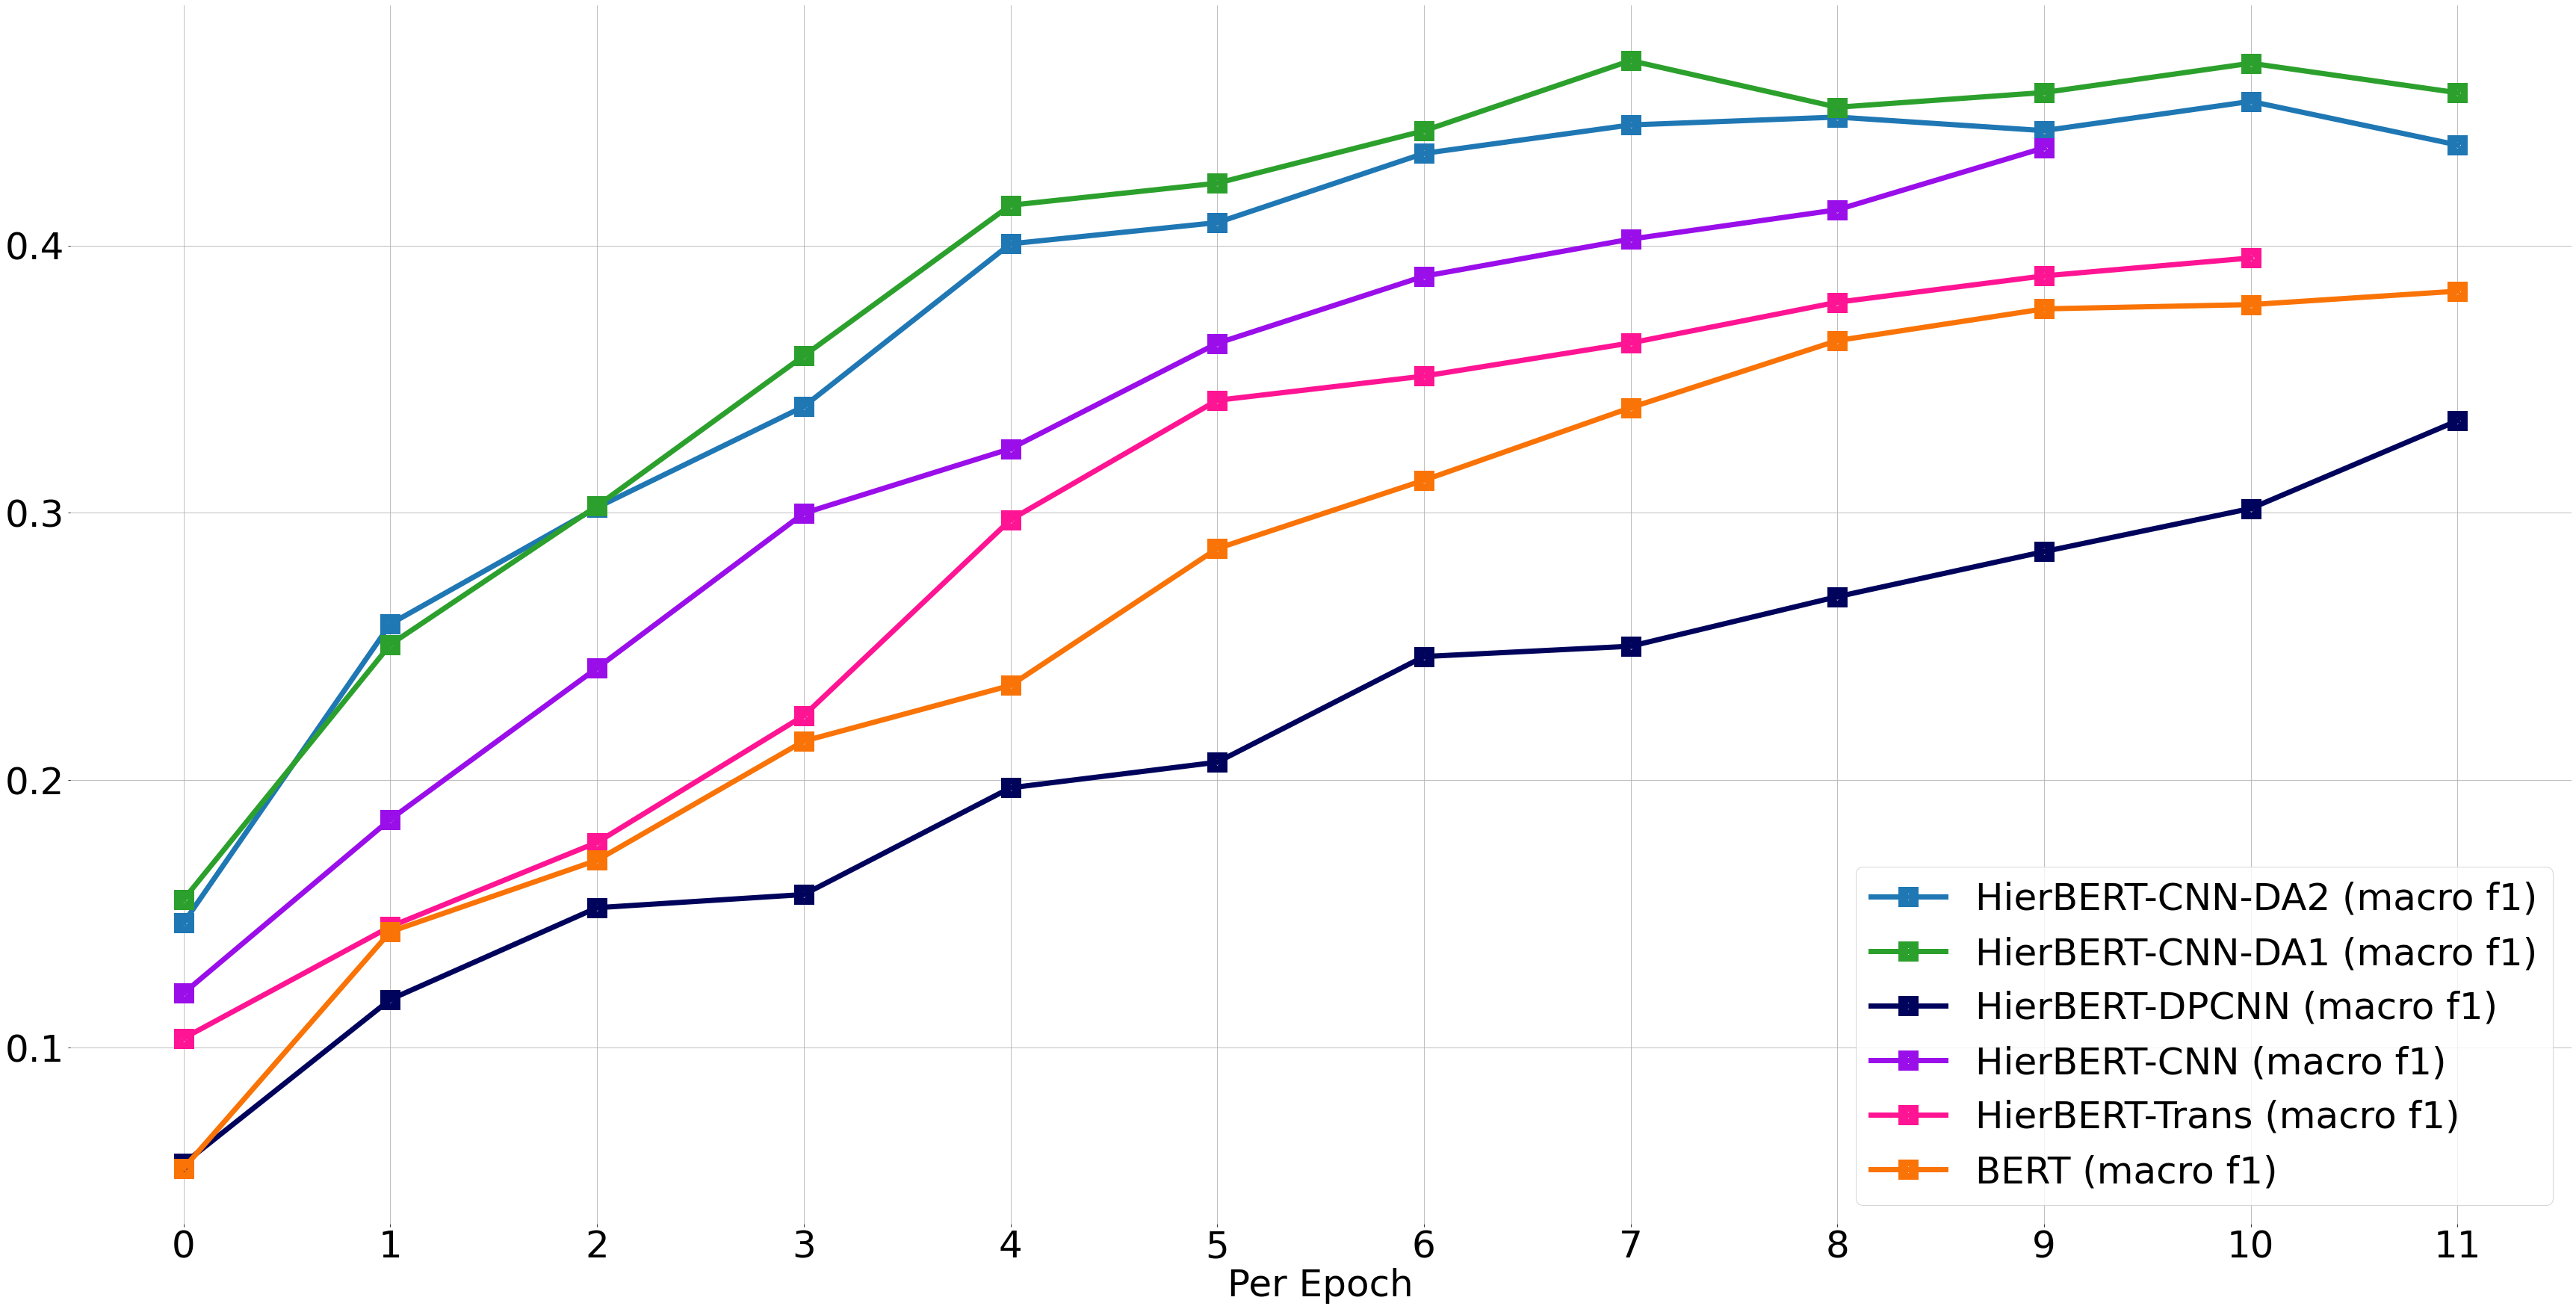

In [128]:
# 打印 F1 
fig, axs = plt.subplots(figsize=(60, 30))
axs.grid()
axs.xaxis.set_major_locator(plt.MultipleLocator(1))
# 可视化 F 1 , macro
# BERT-base F1 macro
axs.plot( np.arange(0,len(bert_cnn_macro_da_da_f1),1), 
          np.array(bert_cnn_macro_da_da_f1),
          label="HierBERT-CNN-DA2 (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          #color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_cnn_macro_da_f1),1), 
          np.array(bert_cnn_macro_da_f1),
          label="HierBERT-CNN-DA1 (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_dpcnn_macro_f1),1), 
          np.array(bert_dpcnn_macro_f1),
          label="HierBERT-DPCNN (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#00035b', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_cnn_macro_f1),1), 
          np.array(bert_cnn_macro_f1),
          label="HierBERT-CNN (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_trans_macro_f1),1), 
          np.array(bert_trans_macro_f1),
          label="HierBERT-Trans (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='deeppink', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_macro_f1),1), 
          np.array(bert_macro_f1),
          label="BERT (macro f1)",
          marker='s',
          markeredgewidth = 21.0,
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
#axs.set_xlabel("Per Epoch",fontsize = 15)
# axs.set_title("F-1 (macro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize = 15)
'''
# 可视化 F 1 micro
# BERT-base F1 micro 
axs.plot( np.arange(0,len(bert_cnn_micro_da_f1),1), 
          np.array(bert_cnn_micro_da_f1),
          label="HierBERT-CNN-DA1 (micro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,  
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_cnn_micro_f1),1), 
          np.array(bert_cnn_micro_f1),
          label="HierBERT-CNN (micro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,  
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_micro_f1),1), 
          np.array(bert_micro_f1),
          label="BERT (micro f1)",
          marker='s',
          markeredgewidth =21.0,  
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
'''
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
axs.set_xlabel("Per Epoch",fontsize = 50)
# axs.set_title("F-1 (micro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize=50)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
plt.xticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.yticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.show()
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/bert_f1.png")

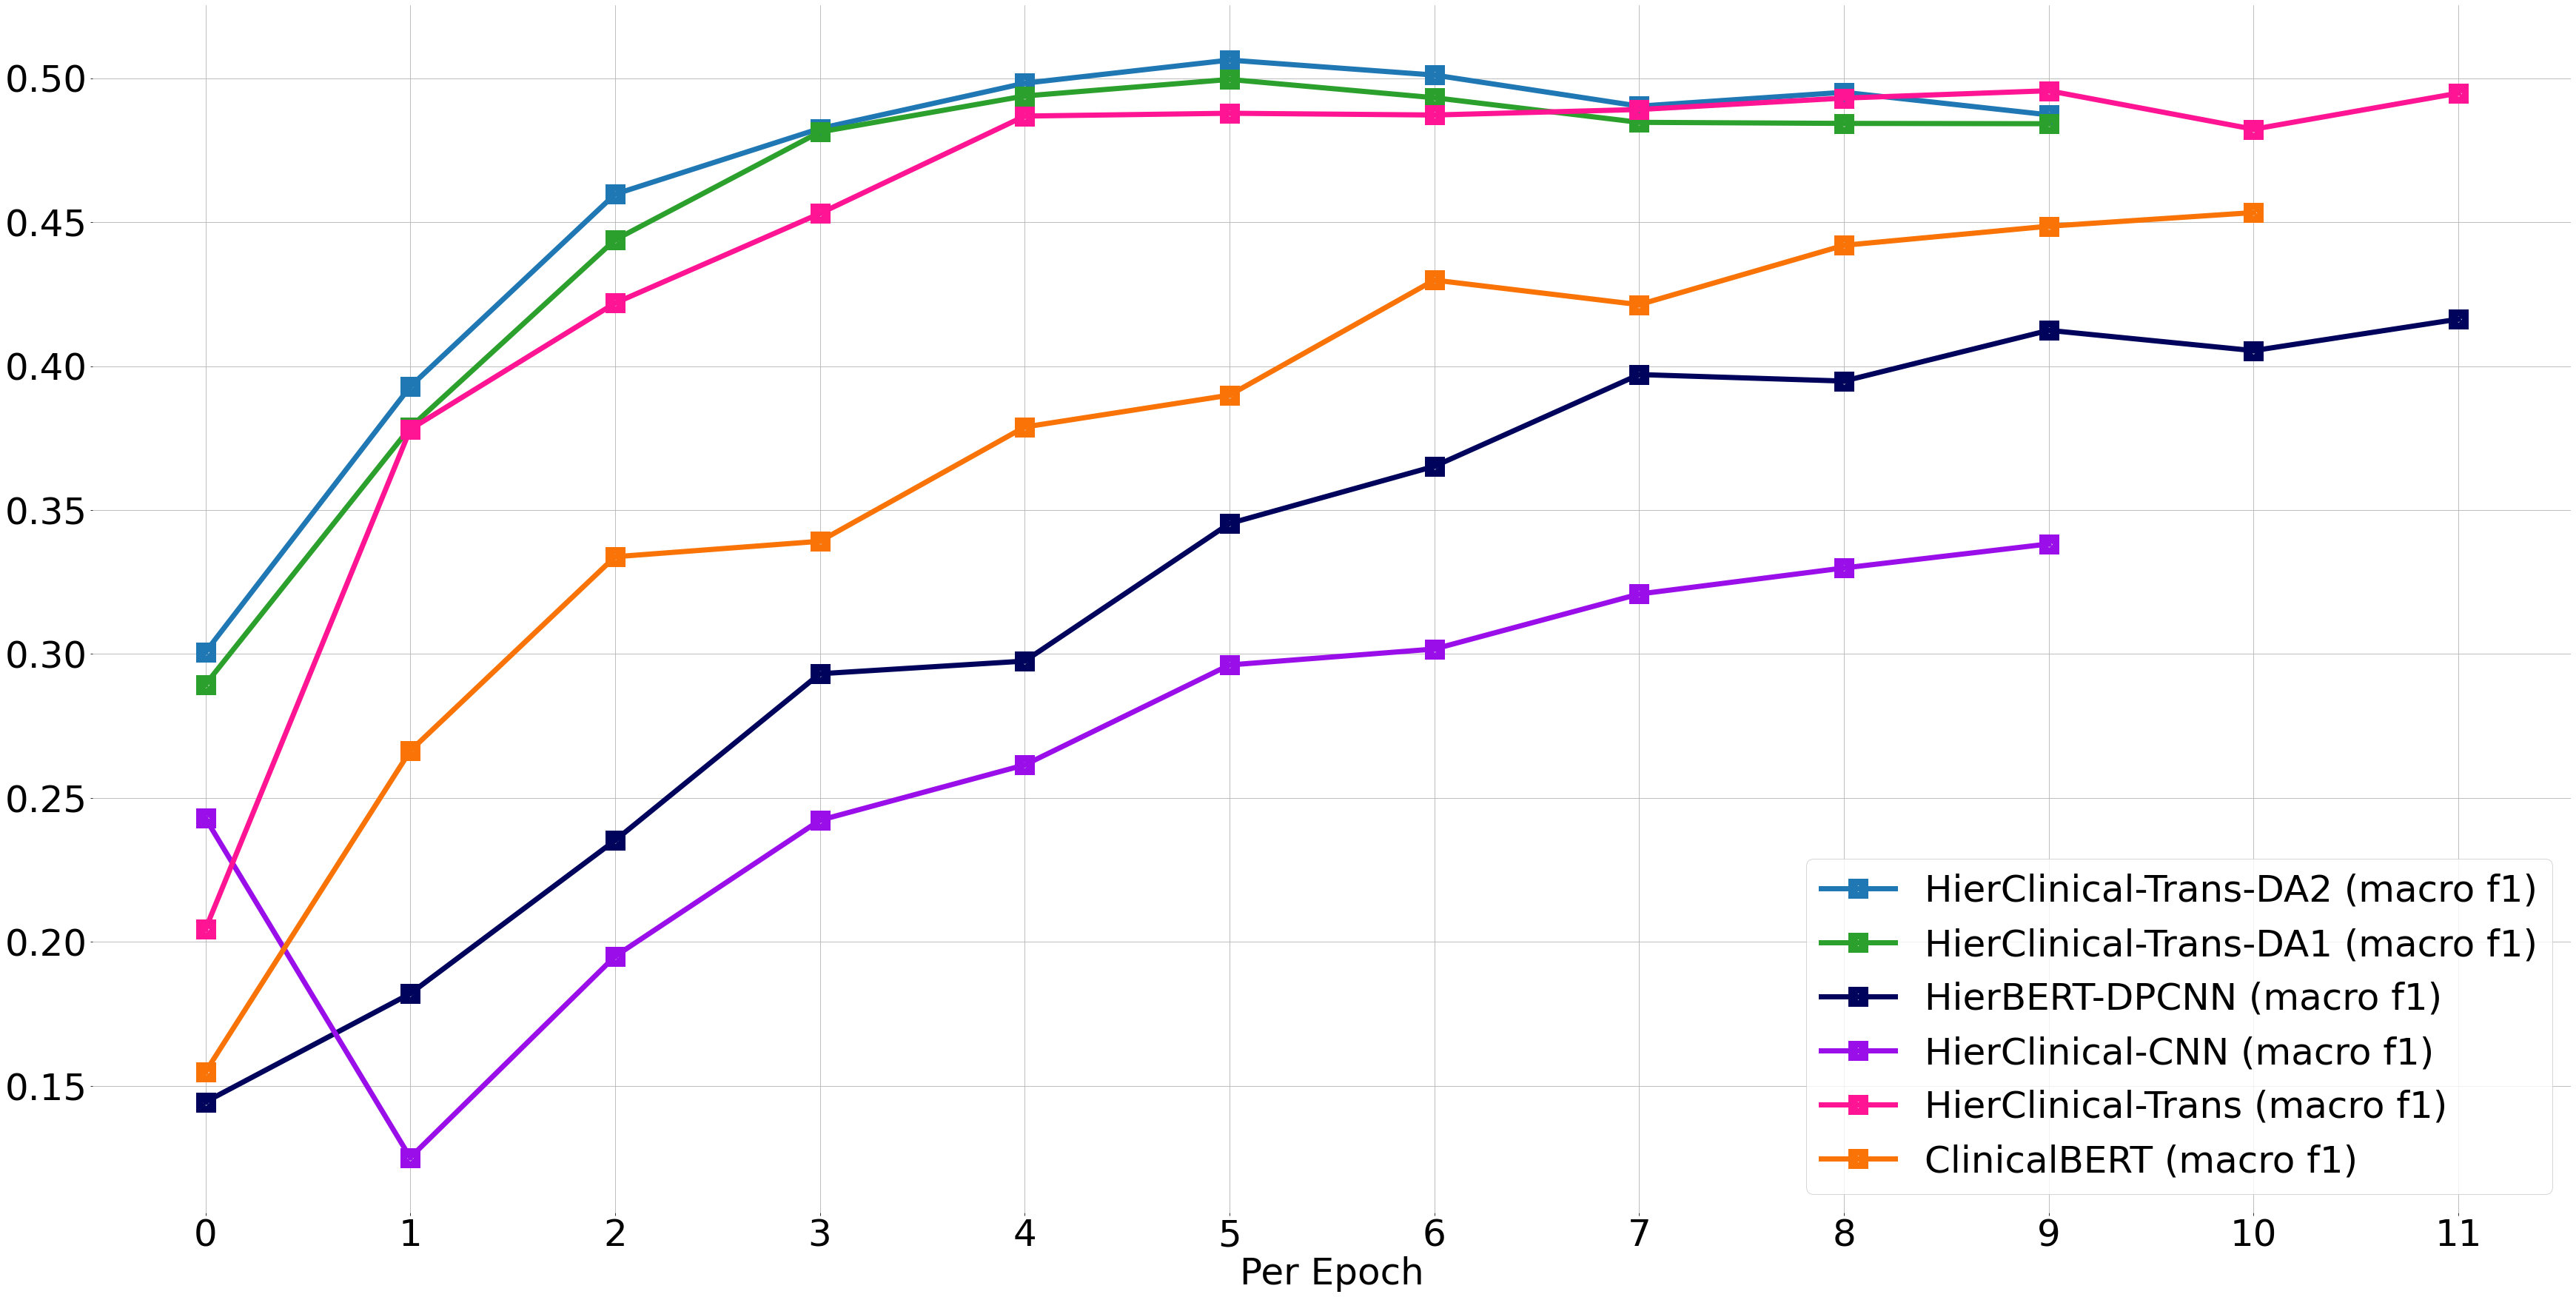

In [117]:
# 打印 F1 
fig, axs = plt.subplots(figsize=(60, 30))
axs.grid()
axs.xaxis.set_major_locator(plt.MultipleLocator(1))
# 可视化 F 1 , macro
# BERT-base F1 macro
axs.plot( np.arange(0,len(clinical_trans_da_da_macro_f1),1), 
          np.array(clinical_trans_da_da_macro_f1),
          label="HierClinical-Trans-DA2 (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          #color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_trans_da_macro_f1),1), 
          np.array(clinical_trans_da_macro_f1),
          label="HierClinical-Trans-DA1 (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_dpcnn_macro_f1),1), 
          np.array(clinical_dpcnn_macro_f1),
          label="HierBERT-DPCNN (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#00035b', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_cnn_macro_f1),1), 
          np.array(clinical_cnn_macro_f1),
          label="HierClinical-CNN (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_trans_macro_f1),1), 
          np.array(clinical_trans_macro_f1),
          label="HierClinical-Trans (macro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='deeppink', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(clinical_macro_f1),1), 
          np.array(clinical_macro_f1),
          label="ClinicalBERT (macro f1)",
          marker='s',
          markeredgewidth = 21.0,
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
#axs.set_xlabel("Per Epoch",fontsize = 15)
# axs.set_title("F-1 (macro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize = 15)

#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
axs.set_xlabel("Per Epoch",fontsize = 50)
# axs.set_title("F-1 (micro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize=50)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
plt.xticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.yticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.show()
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/clinical_f1.png")

### AUC

In [118]:
# Bert_Based Model AUC , epoch = 12
bert_macro_auc = [0.6715683013126222, 0.7313383269692806, 0.7560120969202696, 0.7727873303600109, 0.784679665402678, 0.7946414950685203, 0.7970111644134437, 0.8031163247468592, 0.8026681879073914, 0.8039960540341297, 0.8073188872681706, 0.8062797638994051]

# Bert Transformer Model , epoch 11
bert_trans_macro_auc = [0.681134108932336, 0.703492186438486, 0.7240001495242177, 0.7394555160415949, 0.7525832643523345, 0.7586210573041343, 0.7575463467187822, 0.7612123772017299, 0.7660403144552376, 0.762774944608465, 0.7706273897858391]

# Bert + CNN model , epoch = 9 
bert_cnn_macro_auc = [0.7067401483539019, 0.7533731568589017, 0.7801733455964456, 0.7985669679680416, 0.8111511762107488, 0.8187694269432838, 0.8188501548305066, 0.8232492681158479, 0.8214132109156783, 0.8246901611630092]

# Bert + DPCNN , epoch = 12 
bert_dpcnn_macro_auc = [0.6639835251812959, 0.7049779998905862, 0.7235388590337543, 0.7235924094891223, 0.7387133934604492, 0.7495320815273311, 0.7539393641399679, 0.7646169753535637, 0.7678878808155056, 0.7657906343965841, 0.7668129018772197, 0.769512527650665]

# Bert + Transformer + DA
bert_cnn_macro_da_auc = [0.7340695911426224, 0.7770029381212185, 0.7952726994666761, 0.8135250515908312, 0.823733542455004, 0.8278362020944595, 0.8321556841417564, 0.8311054468968083, 0.8279465508419567, 0.827892893103551, 0.8232759305257258, 0.8222887407892742]
bert_cnn_macro_da_da_auc = [0.7335839124828907, 0.7748323342731389, 0.7945783711520586, 0.8090513129004339, 0.8175398652585415, 0.8215519337136433, 0.8247108112946591, 0.8215900602290173, 0.8208748200449619, 0.8178982068559926, 0.8136568450309862, 0.8115042870565737]

In [131]:
# Bert_Based Model AUC , epoch = 12
clinical_macro_auc = [0.7429346101253698, 0.785724098265846, 0.7994939928005229, 0.8108830177726623, 0.8189590673218656, 0.817740691908873, 0.8174659668052493, 0.8204588619113475, 0.8195777131674277, 0.8200861292414126, 0.8211614601395988, 0.8209047548437794]

# Bert Transformer Model , epoch 11
clinical_trans_macro_auc = checkpoint_clinical_bert_trans['loss']['test_macro_auc']

# Bert + CNN model , epoch = 9 
clinical_cnn_macro_auc = [0.7658736238977899, 0.6962462558091843, 0.7309598659579748, 0.746705404443674, 0.7565990126995034, 0.7607761124242187, 0.7586241120444133, 0.7586979447787482, 0.7534615926394109, 0.7521871290474129]

# Bert + DPCNN , epoch = 12 
clinical_dpcnn_macro_auc = [0.7264547137952097, 0.7662506855724192, 0.782798620039648, 0.7897254163710208, 0.8052857937020833, 0.8105540888621294, 0.8107315193375717, 0.8147866937583931, 0.8155380040782673, 0.8143237560342736, 0.8167855556584963, 0.8158782909151899]

# Bert + Transformer + DA
clinical_trans_macro_da_auc = [0.7683819207202371, 0.7968045935089111, 0.8160533861760575, 0.8227633290543356, 0.8308550187116549, 0.8288800268168969, 0.8309510277510096, 0.828885656174923, 0.8269316823191883, 0.824134450871666]

clinical_trans_macro_da_da_auc = [0.7702477529716725, 0.7965976027651717, 0.8175287155555185, 0.8234611107899732, 0.8298334539337603, 0.8315295254342243, 0.8314755305369872, 0.8299572525948821, 0.8281225439965705, 0.8232440264249371]



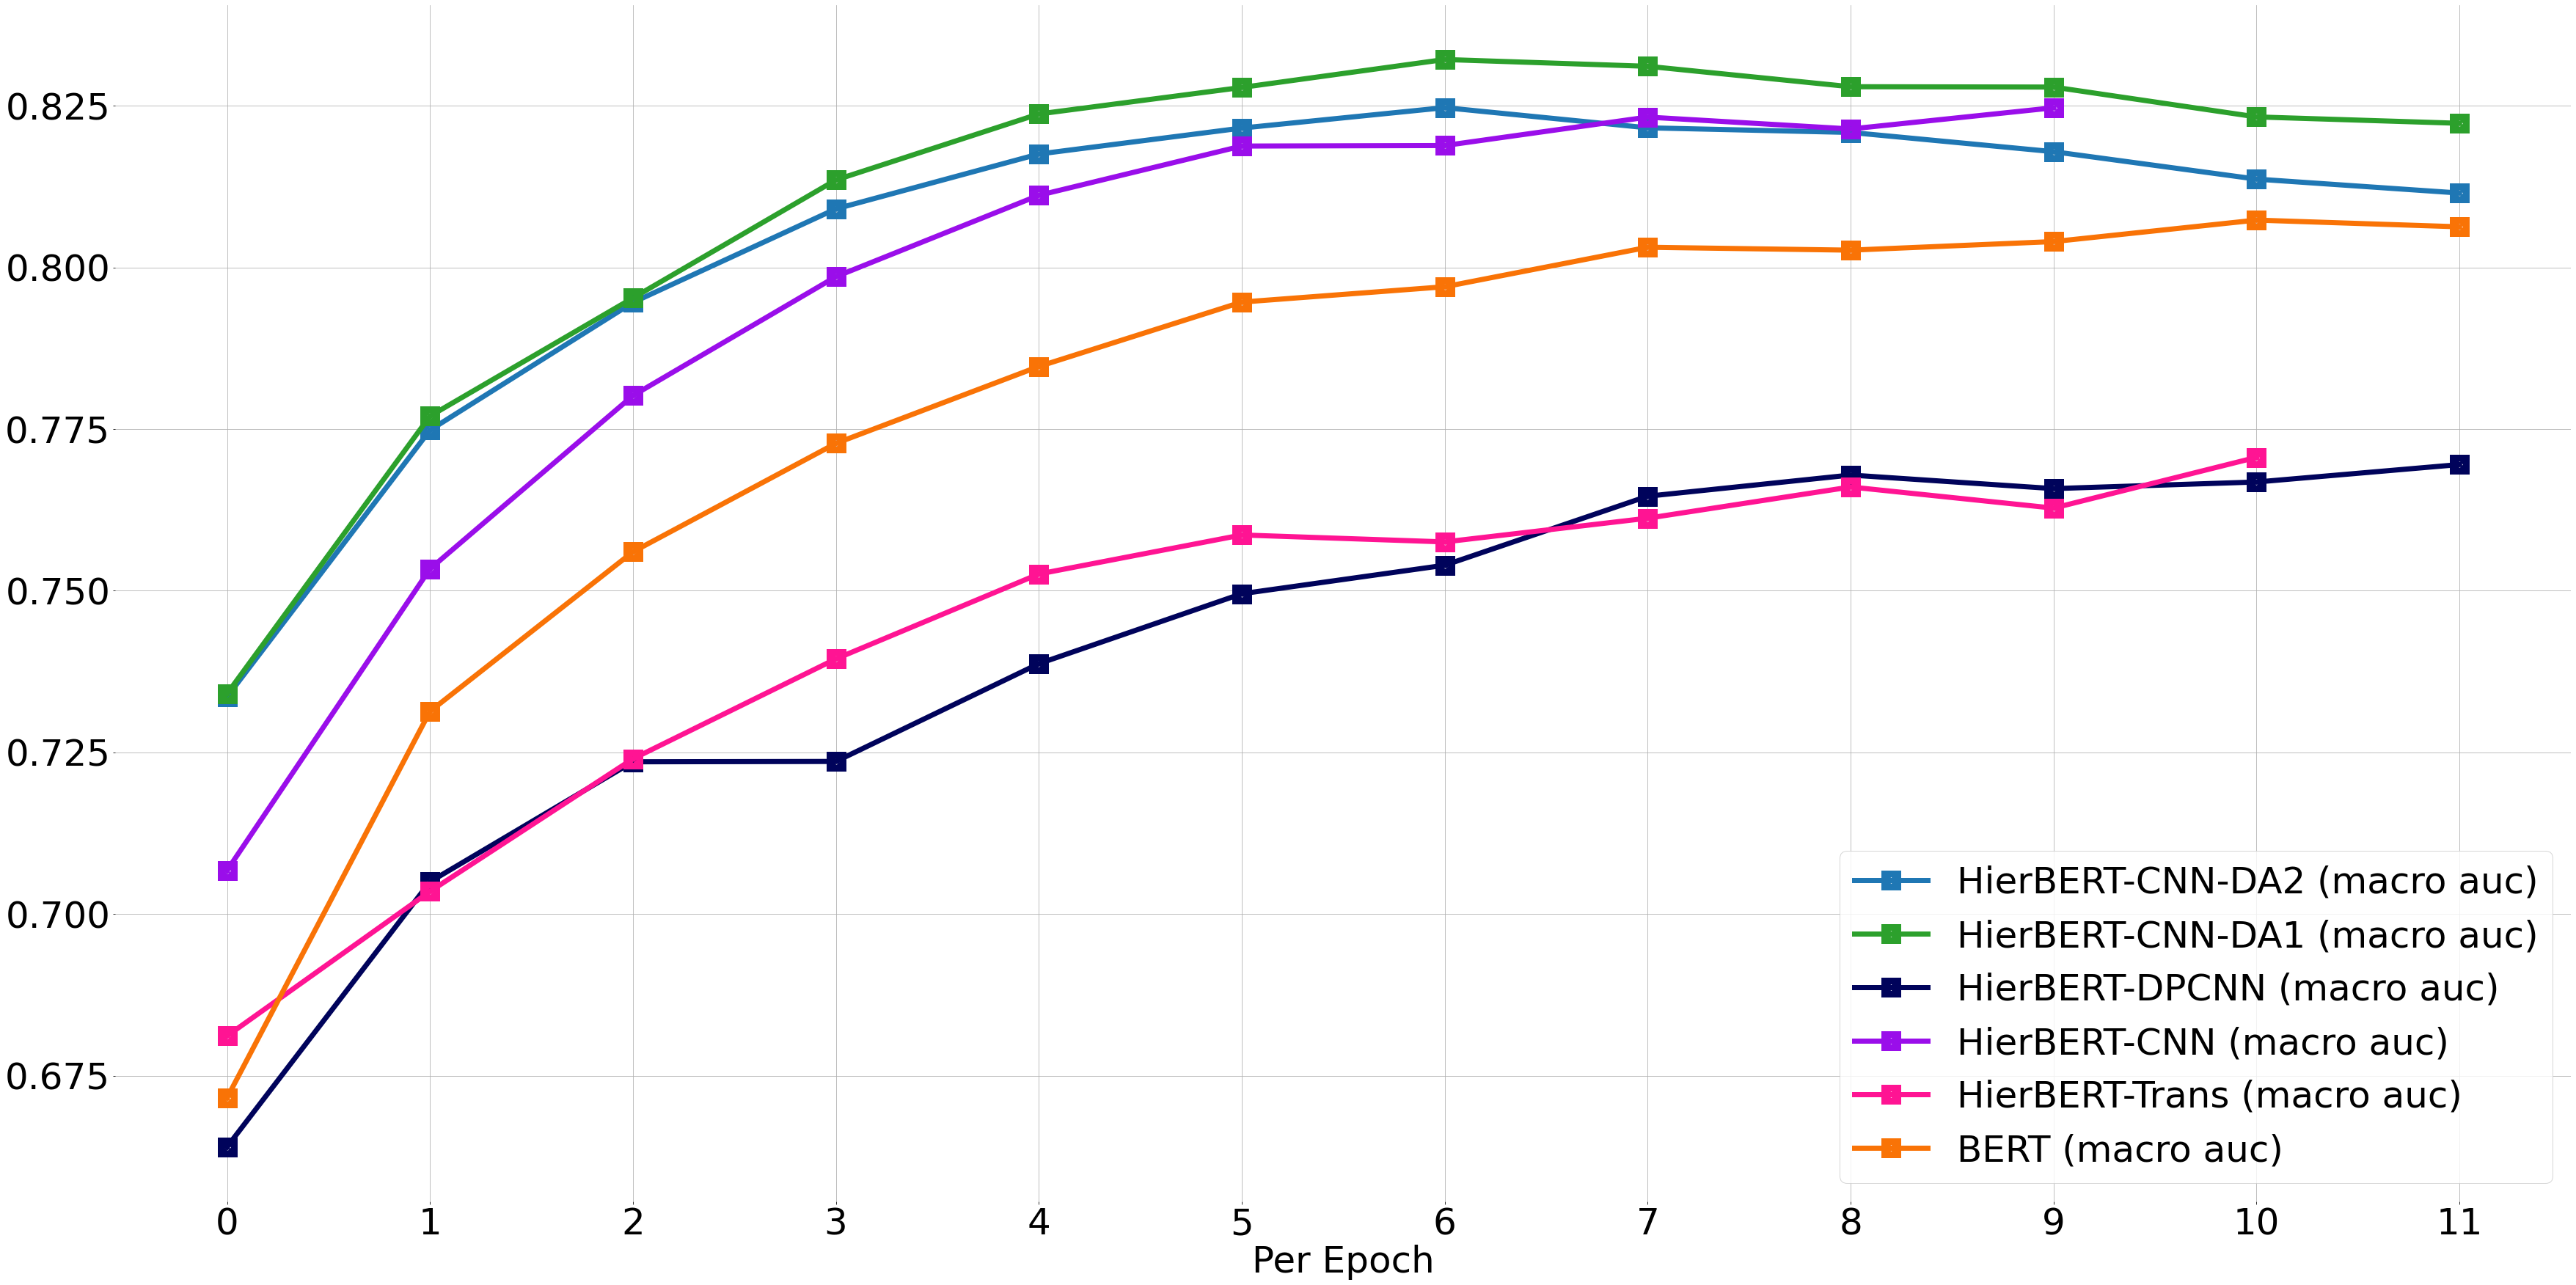

In [129]:
# 打印 F1 
fig, axs = plt.subplots(figsize=(60, 30))
axs.grid()
axs.xaxis.set_major_locator(plt.MultipleLocator(1))
# 可视化 F 1 , macro
# BERT-base F1 macro
axs.plot( np.arange(0,len(bert_cnn_macro_da_da_auc),1), 
          np.array(bert_cnn_macro_da_da_auc),
          label="HierBERT-CNN-DA2 (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          #color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_cnn_macro_da_auc),1), 
          np.array(bert_cnn_macro_da_auc),
          label="HierBERT-CNN-DA1 (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_dpcnn_macro_auc),1), 
          np.array(bert_dpcnn_macro_auc),
          label="HierBERT-DPCNN (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#00035b', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_cnn_macro_auc),1), 
          np.array(bert_cnn_macro_auc),
          label="HierBERT-CNN (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(bert_trans_macro_auc),1), 
          np.array(bert_trans_macro_auc),
          label="HierBERT-Trans (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='deeppink', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_macro_auc),1), 
          np.array(bert_macro_auc),
          label="BERT (macro auc)",
          marker='s',
          markeredgewidth = 21.0,
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
#axs.set_xlabel("Per Epoch",fontsize = 15)
# axs.set_title("F-1 (macro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize = 15)
'''
# 可视化 F 1 micro
# BERT-base F1 micro 
axs.plot( np.arange(0,len(bert_cnn_micro_da_f1),1), 
          np.array(bert_cnn_micro_da_f1),
          label="HierBERT-CNN-DA1 (micro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,  
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_cnn_micro_f1),1), 
          np.array(bert_cnn_micro_f1),
          label="HierBERT-CNN (micro f1)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,  
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(bert_micro_f1),1), 
          np.array(bert_micro_f1),
          label="BERT (micro f1)",
          marker='s',
          markeredgewidth =21.0,  
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
'''
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
axs.set_xlabel("Per Epoch",fontsize = 50)
# axs.set_title("F-1 (micro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize=50)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
plt.xticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.yticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.show()
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/bert_auc.png")

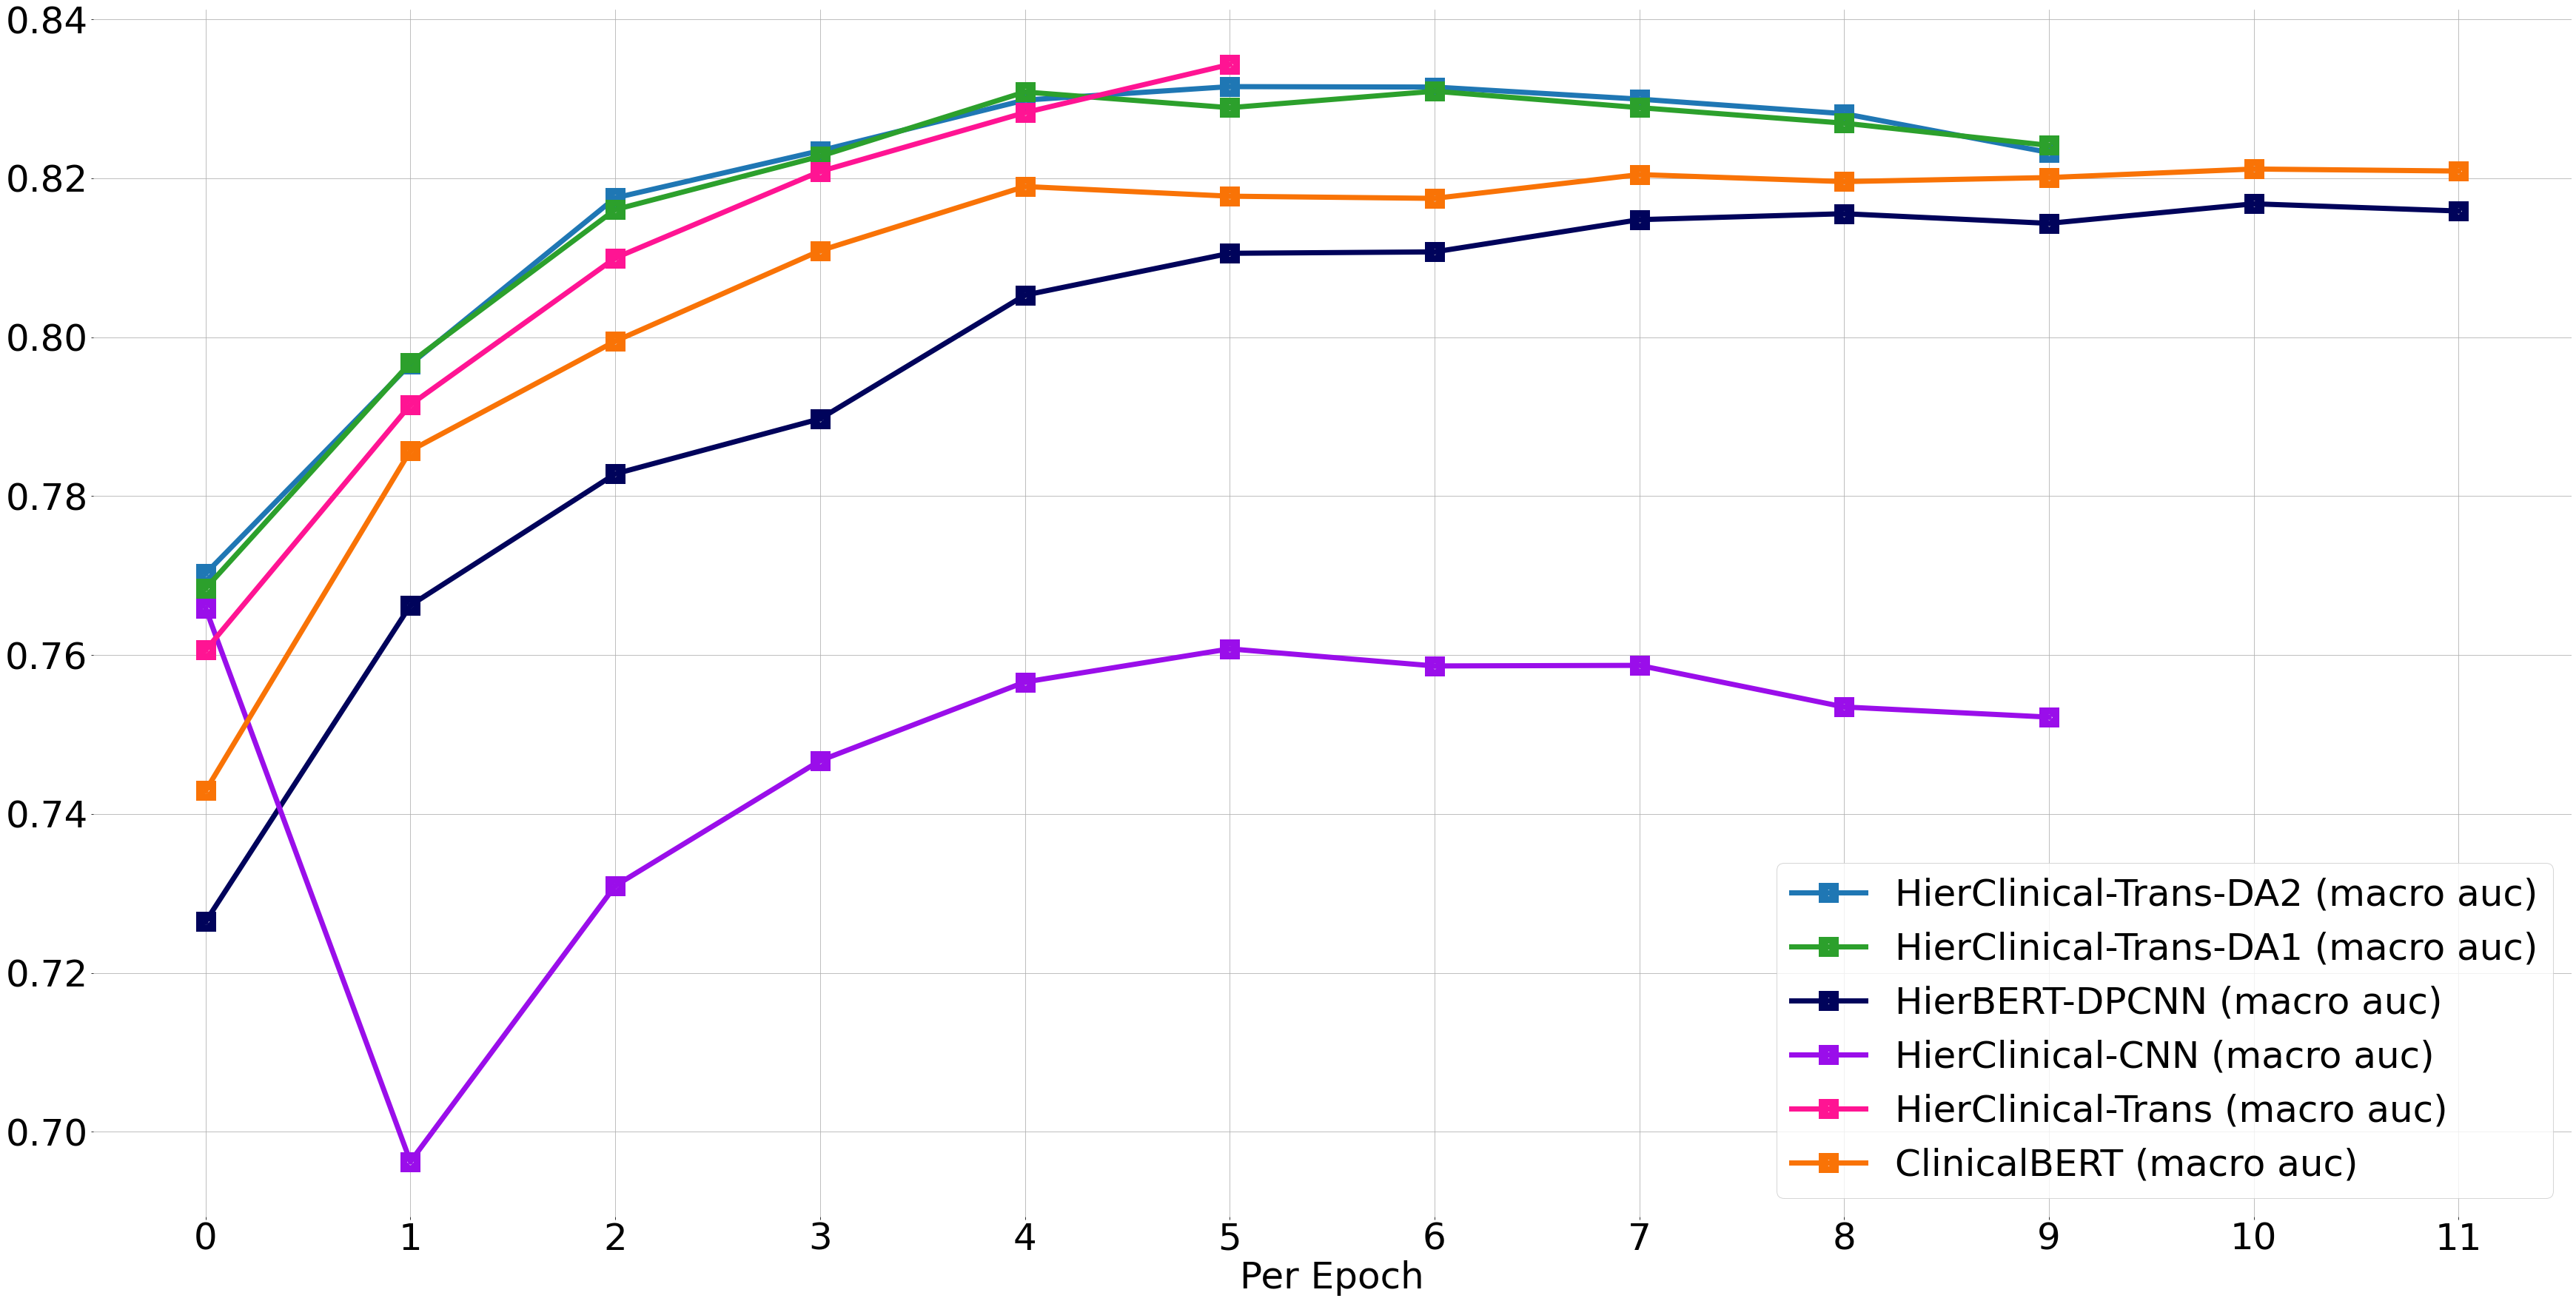

In [134]:
# 打印 F1 
fig, axs = plt.subplots(figsize=(60, 30))
axs.grid()
axs.xaxis.set_major_locator(plt.MultipleLocator(1))
# 可视化 F 1 , macro
# BERT-base F1 macro
axs.plot( np.arange(0,len(clinical_trans_macro_da_da_auc),1), 
          np.array(clinical_trans_macro_da_da_auc),
          label="HierClinical-Trans-DA2 (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          #color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_trans_macro_da_auc),1), 
          np.array(clinical_trans_macro_da_auc),
          label="HierClinical-Trans-DA1 (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#2ca02c', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_dpcnn_macro_auc),1), 
          np.array(clinical_dpcnn_macro_auc),
          label="HierBERT-DPCNN (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#00035b', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_cnn_macro_auc),1), 
          np.array(clinical_cnn_macro_auc),
          label="HierClinical-CNN (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='#9a0eea', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)
axs.plot( np.arange(0,len(clinical_trans_macro_auc),1), 
          np.array(clinical_trans_macro_auc),
          label="HierClinical-Trans (macro auc)",
          marker='s',
          alpha = 1.0,
          markeredgewidth = 21.0,
          color='deeppink', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          # linestyle=":",
          linewidth=7,)

axs.plot( np.arange(0,len(clinical_macro_auc),1), 
          np.array(clinical_macro_auc),
          label="ClinicalBERT (macro auc)",
          marker='s',
          markeredgewidth = 21.0,
          color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
          #linestyle=":",
          linewidth=7,)
#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
#axs.set_xlabel("Per Epoch",fontsize = 15)
# axs.set_title("F-1 (macro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize = 15)

#axs.set_xlim([0.0, 1.0])
#axs.set_ylim([0.0, 1.05])
axs.set_xlabel("Per Epoch",fontsize = 50)
# axs.set_title("F-1 (micro) per Epoch on Test Data",fontsize = 20)
axs.legend(loc='lower right',fontsize=50)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
plt.xticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.yticks(fontname="Calibri",fontsize=50,rotation=0) # 设置 x轴上的数字大小和旋转程度
plt.show()
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/clinical_auc.png")

# ROC_AUC curve 

In [ ]:
def get_roc_auc(val_targets,val_outputs):
  # input : val_targets 标签 ； val_outputs 模型的输出 (需要np.array类型)
  # output: return_fpr (micro,macro) , return_tpr (micro,macro) (list)
  # output: return_roc_auc (micro,macro)  (float)
  # Compute ROC curve and ROC area for each class
  n_classes = len(val_targets[0]) # [num_example,num_class] 
  fpr = {}
  tpr = {}
  roc_auc = {}
  for i in range(n_classes):
    fpr_, tpr_, _ = roc_curve(val_targets[:, i], val_outputs[:, i])
    fpr[i] = fpr_.tolist()
    tpr[i] = tpr_.tolist()
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr_, tpr_, _ = roc_curve(val_targets.ravel(), val_outputs.ravel())
  fpr['micro'] = fpr_.tolist()
  tpr['micro'] = tpr_.tolist()
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
  # Finally average it and compute AUC
  mean_tpr /= n_classes
  fpr["macro"] = all_fpr.tolist()
  tpr["macro"] = mean_tpr.tolist()
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # 返回时，我们只需要micro,macro的信息即可
  return_fpr = {'macro':fpr['macro'],'micro':fpr['micro']}
  return_tpr = {'macro':tpr['macro'],'micro':tpr['micro']}
  return_roc_auc = {'macro':roc_auc['macro'],'micro':roc_auc['micro']}
  return return_fpr,return_tpr,return_roc_auc

In [ ]:
# 计算 Bert_base 的 tpr , fpr, auc_score
bert_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_outputs.npy")
bert_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_targets.npy")
bert_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_predictions.npy")
bert_fpr,bert_tpr,bert_auc = get_roc_auc(bert_val_targets,bert_val_outputs)

# 计算 clinical_Bert 的 tpr , fpr, auc_score
clinical_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_outputs.npy")
clinical_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_targets.npy")
clinical_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_predictions.npy")
clinical_fpr,clinical_tpr,clinical_auc = get_roc_auc(clinical_val_targets,clinical_val_outputs)

# 计算 clinicallong 的 tpr , fpr, auc_score
clinicallong_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_outputs.npy")
clinicallong_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_targets.npy")
clinicallong_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_predictions.npy")
clinicallong_fpr,clinicallong_tpr,clinicallong_auc = get_roc_auc(clinicallong_val_targets,clinicallong_val_outputs)

# 计算 CAML 的 tpr , fpr, auc_score
caml_val_outputs = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_outputs_epoch_180.npy")
caml_val_targets = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_targets_epcoh_180.npy")
caml_val_predictions = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_predictions_epoch_180.npy")
caml_fpr,caml_tpr,caml_auc = get_roc_auc(caml_val_targets,caml_val_outputs)

# 计算 DRCAML 的 tpr , fpr, auc_score
drcaml_val_outputs = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_outputs_epoch_180.npy")
drcaml_val_targets = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_targets_epcoh_180.npy")
drcaml_val_predictions = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_predictions_epoch_180.npy")
drcaml_fpr,drcaml_tpr,drcaml_auc = get_roc_auc(drcaml_val_targets,drcaml_val_outputs)

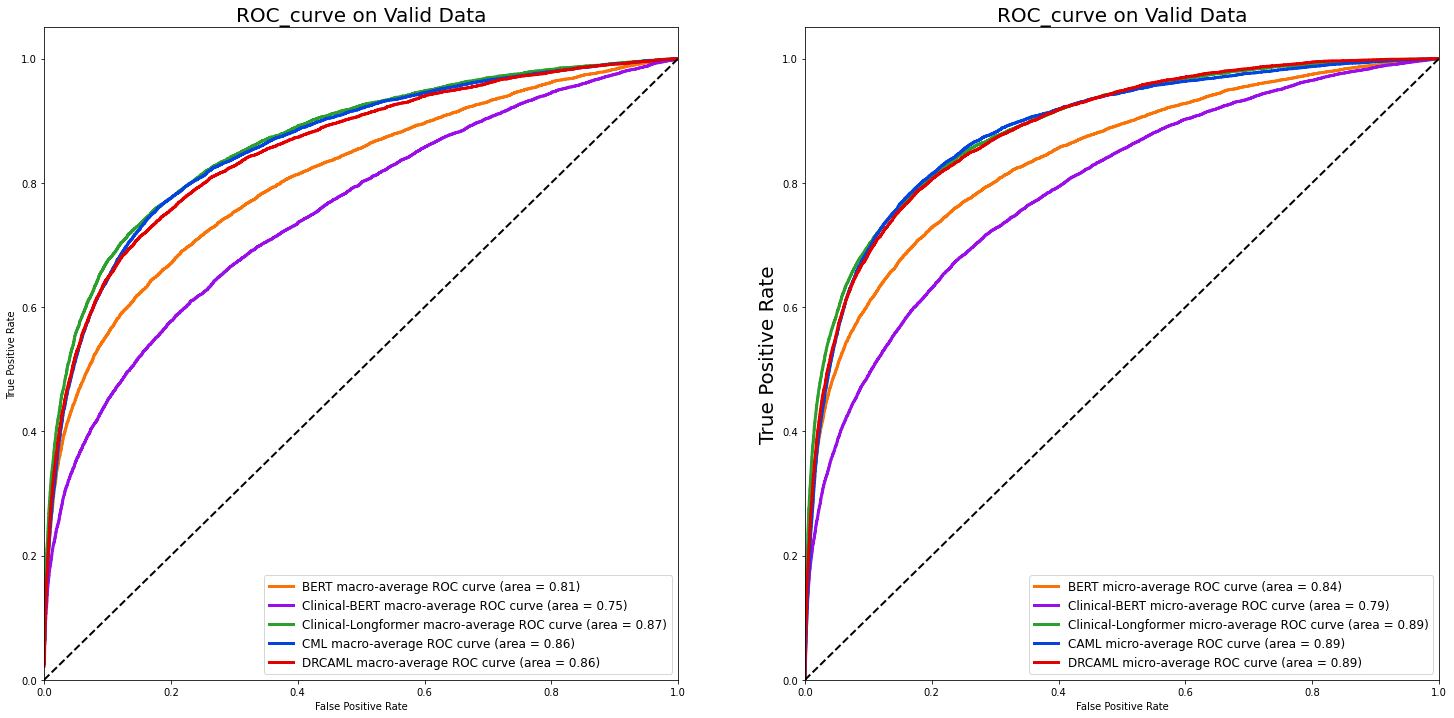

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(25, 12))

# 打印 BERT_base 的 AUC_macro 曲线
axs[0].step(
      bert_fpr["macro"],
      bert_tpr["macro"],
      label="BERT macro-average ROC curve (area = {0:0.2f})".format(bert_auc['macro']),
      color='#f97306', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,)
axs[0].step(
      clinical_fpr["macro"],
      clinical_tpr["macro"],
      label="Clinical-BERT macro-average ROC curve (area = {0:0.2f})".format(clinical_auc['macro']),
      color='#9a0eea', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,)
axs[0].step(
      clinicallong_fpr["macro"],
      clinicallong_tpr["macro"],
      label="Clinical-Longformer macro-average ROC curve (area = {0:0.2f})".format(clinicallong_auc['macro']),
      color='#2ca02c', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,)
axs[0].step(
      caml_fpr["macro"],
      caml_tpr["macro"],
      label="CML macro-average ROC curve (area = {0:0.2f})".format(caml_auc['macro']),
      color='#0343df',  # 蓝 
      #linestyle=":",
      linewidth=3,)
axs[0].step(
      drcaml_fpr["macro"],
      drcaml_tpr["macro"],
      label="DRCAML macro-average ROC curve (area = {0:0.2f})".format(drcaml_auc['macro']),
      color='#e50000', # 大红
      #linestyle=":",
      linewidth=3,)
axs[0].plot([0, 1], [0, 1], "k--", lw=2)
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].set_title("ROC_curve on Valid Data",fontsize=20)

# 打印 BERT_based 的 AUC_micro curve
axs[1].step(
      bert_fpr["micro"],
      bert_tpr["micro"],
      label="BERT micro-average ROC curve (area = {0:0.2f})".format(bert_auc["micro"]),
      color='#f97306', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,
      ) 
axs[1].step(
      clinical_fpr["micro"],
      clinical_tpr["micro"],
      label="Clinical-BERT micro-average ROC curve (area = {0:0.2f})".format(clinical_auc["micro"]),
      color='#9a0eea', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,
      ) 
axs[1].step(
      clinicallong_fpr["micro"],
      clinicallong_tpr["micro"],
      label="Clinical-Longformer micro-average ROC curve (area = {0:0.2f})".format(clinicallong_auc["micro"]),
      color='#2ca02c', # "deeppink" 红，"#01ff07"绿,'#9a0eea'紫 ,'#f97306'橙
      #linestyle=":",
      linewidth=3,
      ) 
axs[1].step(
      caml_fpr["micro"],
      caml_tpr["micro"],
      label="CAML micro-average ROC curve (area = {0:0.2f})".format(caml_auc["micro"]),
      color='#0343df',  # 蓝 
      #linestyle=":",
      linewidth=3,
      ) 
axs[1].step(
      drcaml_fpr["micro"],
      drcaml_tpr["micro"],
      label="DRCAML micro-average ROC curve (area = {0:0.2f})".format(drcaml_auc["micro"]),
      color='#e50000', # 大红
      #linestyle=":",
      linewidth=3,
      ) 
axs[1].plot([0, 1], [0, 1], "k--", lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate",fontsize = 20)
axs[1].set_title("ROC_curve on Valid Data",fontsize=20)

for ax in axs:
  ax.legend(loc="lower right",fontsize=12)
plt.show()  
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/ROC_curve.png")

# F 1 - top 50 codes

In [135]:
# 计算 50 个标签每一个的F1值
idx2code = {0: '038.9', 1: '244.9', 2: '250.00', 3: '272.0', 4: '272.4', 5: '276.1', 6: '276.2', 7: '285.1', 8: '285.9', 9: '287.5', 10: '305.1', 11: '311', 12: '33.24', 13: '36.15', 14: '37.22', 15: '37.23', 16: '38.91', 17: '38.93', 18: '39.61', 19: '39.95', 20: '401.9', 
            21: '403.90', 22: '410.71', 23: '412', 24: '414.01', 25: '424.0', 26: '427.31', 27: '428.0', 28: '45.13', 29: '486', 30: '496', 31: '507.0', 32: '511.9', 33: '518.81', 34: '530.81', 35: '584.9', 36: '585.9', 37: '599.0', 38: '88.56', 39: '88.72', 40: '96.04', 
            41: '96.6', 42: '96.71', 43: '96.72', 44: '99.04', 45: '99.15', 46: '995.92', 47: 'V15.82', 48: 'V45.81', 49: 'V58.61'}
# 计算 BERT-Base 在 Train_Dataset 上的表现, 为了画出 top-50 codes distribution 
bert_train_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_train_outputs.npy")
bert_train_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_train_targets.npy")
bert_train_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_train_predictions.npy")
# 先创建一个字典，code -- support in train dataset 
bert_train_perform = []
for index in range(len(bert_train_targets[0])):
  y_true = bert_train_targets[:,index]
  y_pred = bert_train_predictions[:,index]
  con_me = classification_report(y_true, y_pred, target_names = ['class 0', 'class 1'])
  my_clean_list = []
  for ele in con_me.split('\n'):
    if len(ele) > 0 :
      ele = ele.strip()
      ele_list = []
      for ele_ele in ele.split(' '):
        if len(ele_ele) > 0:
          ele_list.append(ele_ele)
      my_clean_list.append(ele_list)
  bert_train_perform.append([index,int(my_clean_list[2][5])])  # [label_index,support]
bert_train_perform


[[0, 567],
 [1, 761],
 [2, 1416],
 [3, 926],
 [4, 1259],
 [5, 494],
 [6, 694],
 [7, 726],
 [8, 852],
 [9, 471],
 [10, 504],
 [11, 493],
 [12, 407],
 [13, 719],
 [14, 482],
 [15, 438],
 [16, 773],
 [17, 2139],
 [18, 1096],
 [19, 549],
 [20, 3233],
 [21, 513],
 [22, 520],
 [23, 477],
 [24, 1921],
 [25, 451],
 [26, 1992],
 [27, 2115],
 [28, 415],
 [29, 765],
 [30, 646],
 [31, 569],
 [32, 421],
 [33, 1186],
 [34, 953],
 [35, 1448],
 [36, 544],
 [37, 1067],
 [38, 801],
 [39, 530],
 [40, 1581],
 [41, 1525],
 [42, 1395],
 [43, 969],
 [44, 1287],
 [45, 736],
 [46, 613],
 [47, 397],
 [48, 479],
 [49, 604]]

In [136]:
def get_model_perform(val_targets,val_predictions,support_data):
  model_perform = []
  for index in range(len(val_targets[0])):
    y_true = val_targets[:,index]
    y_pred = val_predictions[:,index]
    con_me = classification_report(y_true, y_pred, target_names = ['class 0', 'class 1'])
    my_clean_list = []
    for ele in con_me.split('\n'):
      if len(ele) > 0 :
        ele = ele.strip()
        ele_list = []
        for ele_ele in ele.split(' '):
          if len(ele_ele) > 0:
            ele_list.append(ele_ele)
        my_clean_list.append(ele_list)
    model_perform.append([index,support_data[index][1],float(my_clean_list[4][4]),float(my_clean_list[2][4])])  # [label_index,support,macro_f1,class1_f1] , 这里要格外注意我们是直接拿train data 里的support数据，没有计算

  # 下面我们进行冒泡排序
  for index_1 in range(0,len(model_perform)-1):
    for index_2 in range(0,len(model_perform)-1):
      if model_perform[index_2][1] > model_perform[index_2 + 1][1]:
        meddle = model_perform[index_2]
        model_perform.remove(model_perform[index_2])
        model_perform.insert(index_2+1,meddle)
  # 做成字典
  model_perform_dict = {'label':[],'label_name':[],'support':[],'macro_f1':[],'class1_f1':[]}
  for ele in model_perform:
    model_perform_dict['label'].append(ele[0])
    model_perform_dict['label_name'].append(idx2code[ele[0]])
    model_perform_dict['support'].append(ele[1])
    model_perform_dict['macro_f1'].append(ele[2])
    model_perform_dict['class1_f1'].append(ele[3])
  return model_perform_dict

In [137]:
os.chdir("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result")

In [138]:
# 计算 BERT-Base 在 Valid_Dataset 上的表现
bert_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_outputs.npy")
bert_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_targets.npy")
bert_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/bert_base/bert_val_predictions.npy")
bert_perform_dict = get_model_perform(bert_val_targets,bert_val_predictions,support_data=bert_train_perform)

# 计算 Clinical-BERT 在 Valid_Dataset 上的表现
clinical_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_outputs.npy")
clinical_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_targets.npy")
clinical_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical-bert/clinical_val_predictions.npy")
clinical_perform_dict = get_model_perform(clinical_val_targets,clinical_val_predictions,support_data=bert_train_perform)

# 计算 Clinical-Longformer 在 Valid_Dataset 上的表现
clinicallong_val_outputs = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_outputs.npy")
clinicallong_val_targets = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_targets.npy")
clinicallong_val_predictions = np.load("/content/drive/My Drive/MIMIC/BERT_FineTune/clinical_longformer/clinicallong_val_predictions.npy")
clinicallong_perform_dict = get_model_perform(clinicallong_val_targets,clinicallong_val_predictions,support_data=bert_train_perform)

# 计算 CMAL model 在 Valdi_Dataset 上的表现
caml_val_outputs = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_outputs_epoch_180.npy")
caml_val_targets = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_targets_epcoh_180.npy")
caml_val_predictions = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/CAML_mimic3_50/process_result/val_full_predictions_epoch_180.npy")
caml_perform_dict = get_model_perform(caml_val_targets,caml_val_predictions,support_data=bert_train_perform)

# 计算 DRCMAL model 在 Valdi_Dataset 上的表现
drcaml_val_outputs = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_outputs_epoch_190.npy")
drcaml_val_targets = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_targets_epcoh_190.npy")
drcaml_val_predictions = np.load("/content/drive/My Drive/MIMIC/caml-mimic/predictions/DRCAML_mimic3_50/process_result/val_full_predictions_epoch_190.npy")
drcaml_perform_dict = get_model_perform(drcaml_val_targets,drcaml_val_predictions,support_data=bert_train_perform)


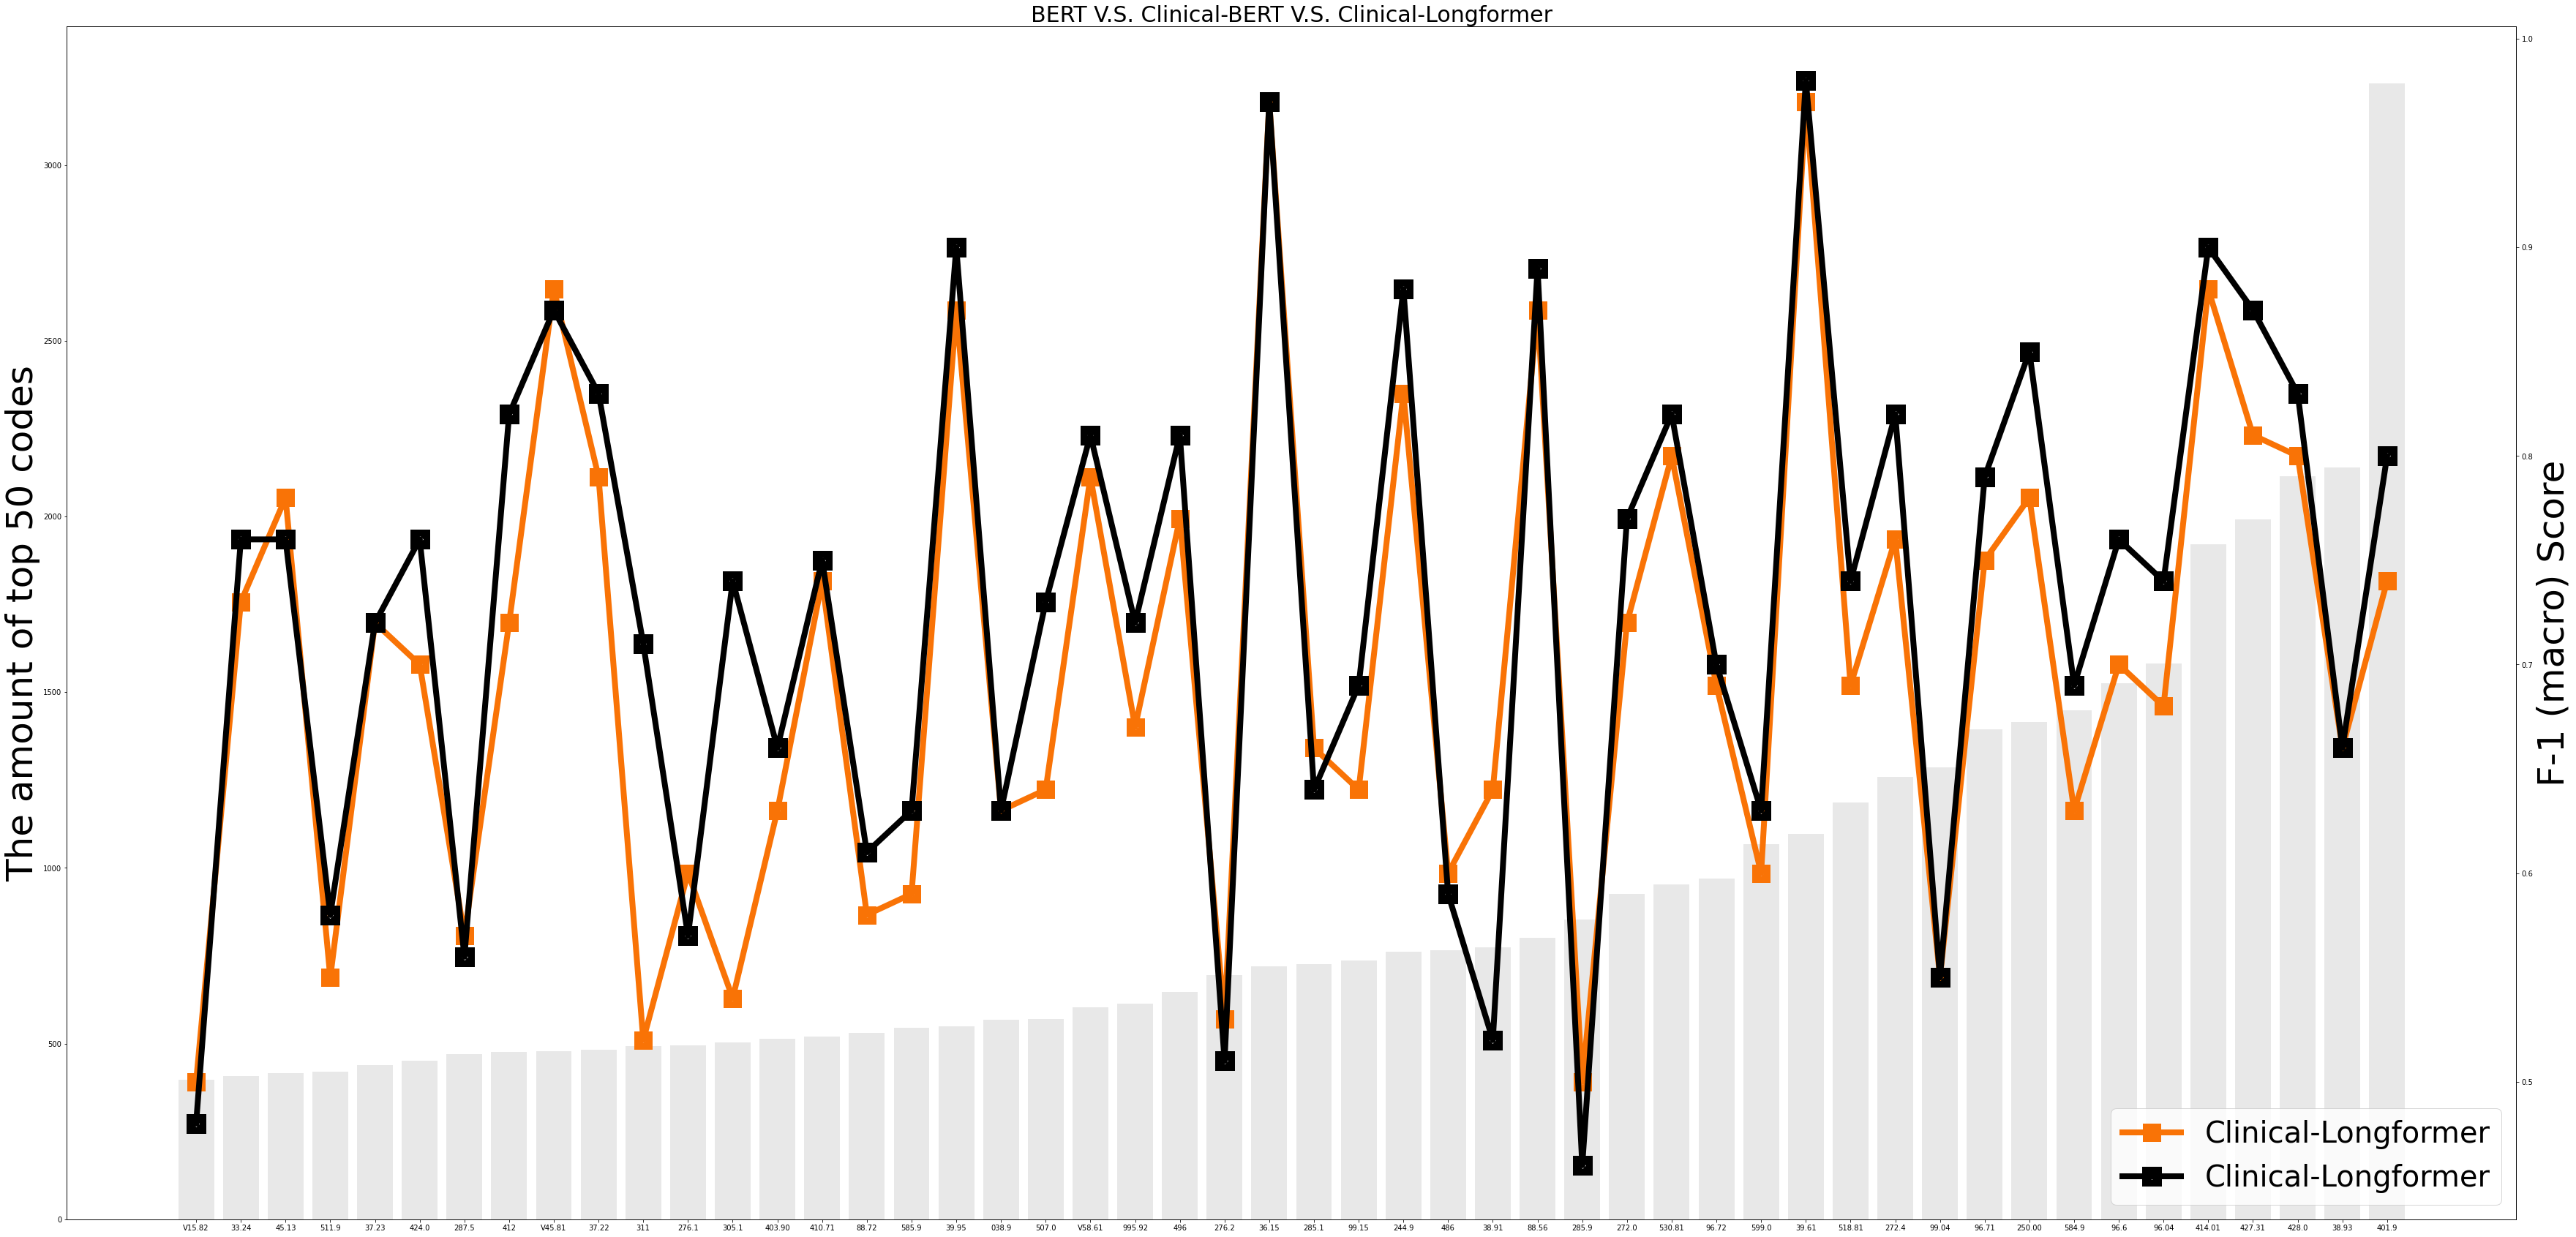

In [148]:
# 画出 数量 + F-1 （macro）的综合图表
x = bert_perform_dict['label_name']
bert_support = bert_perform_dict['support']
bert_f1_macro = bert_perform_dict['macro_f1']

clinical_support = clinical_perform_dict['support']
clinical_f1_macro = clinical_perform_dict['macro_f1']

clinicallong_support = clinicallong_perform_dict['support']
clinicallong_f1_macro = clinicallong_perform_dict['macro_f1']

caml_support = caml_perform_dict['support']
caml_f1_macro = caml_perform_dict['macro_f1']

drcaml_support = drcaml_perform_dict['support']
drcaml_f1_macro = drcaml_perform_dict['macro_f1']


############# 开始作图 ######################
fig,ax1 = plt.subplots(figsize=(60, 30))
ax2 = ax1.twinx()           # 做镜像处理

# 柱形图,数量
ax1.bar(x,
        bert_support,
        color='lightgrey',
        alpha = 0.5)
ax1.set_ylabel("The amount of top 50 codes",fontsize=50)
ax1.set_title("BERT V.S. Clinical-BERT V.S. Clinical-Longformer",fontsize=30)
plt.xticks(fontname="Calibri",fontsize=50,rotation=30) # 设置 x轴上的数字大小和旋转程度

# 折线图，F1
ax2.plot(x,
         bert_f1_macro,
         marker='s',
         markeredgewidth = 19.0,
         #linestyle=":",
         linewidth=8,
         color='#f97306', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
         label = 'Clinical-Longformer')
ax2.plot(x,
         clinicallong_f1_macro,
         marker='s',
         markeredgewidth = 21.0,
         #linestyle=":",
         linewidth=8,
         color='#000000', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
         label = 'Clinical-Longformer')

ax2.set_ylabel("F-1 (macro) Score",fontsize=50)
ax2.legend(loc='lower right',fontsize=40)
plt.xticks(fontname="Calibri",fontsize=50,rotation=30) # 设置 x轴上的数字大小和旋转程度
#plt.yticks(fontname="Calibri",fontsize=50,rotation=30) # 设置 x轴上的数字大小和旋转程度
plt.show()  
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/f1_dis_clinicallong.png")

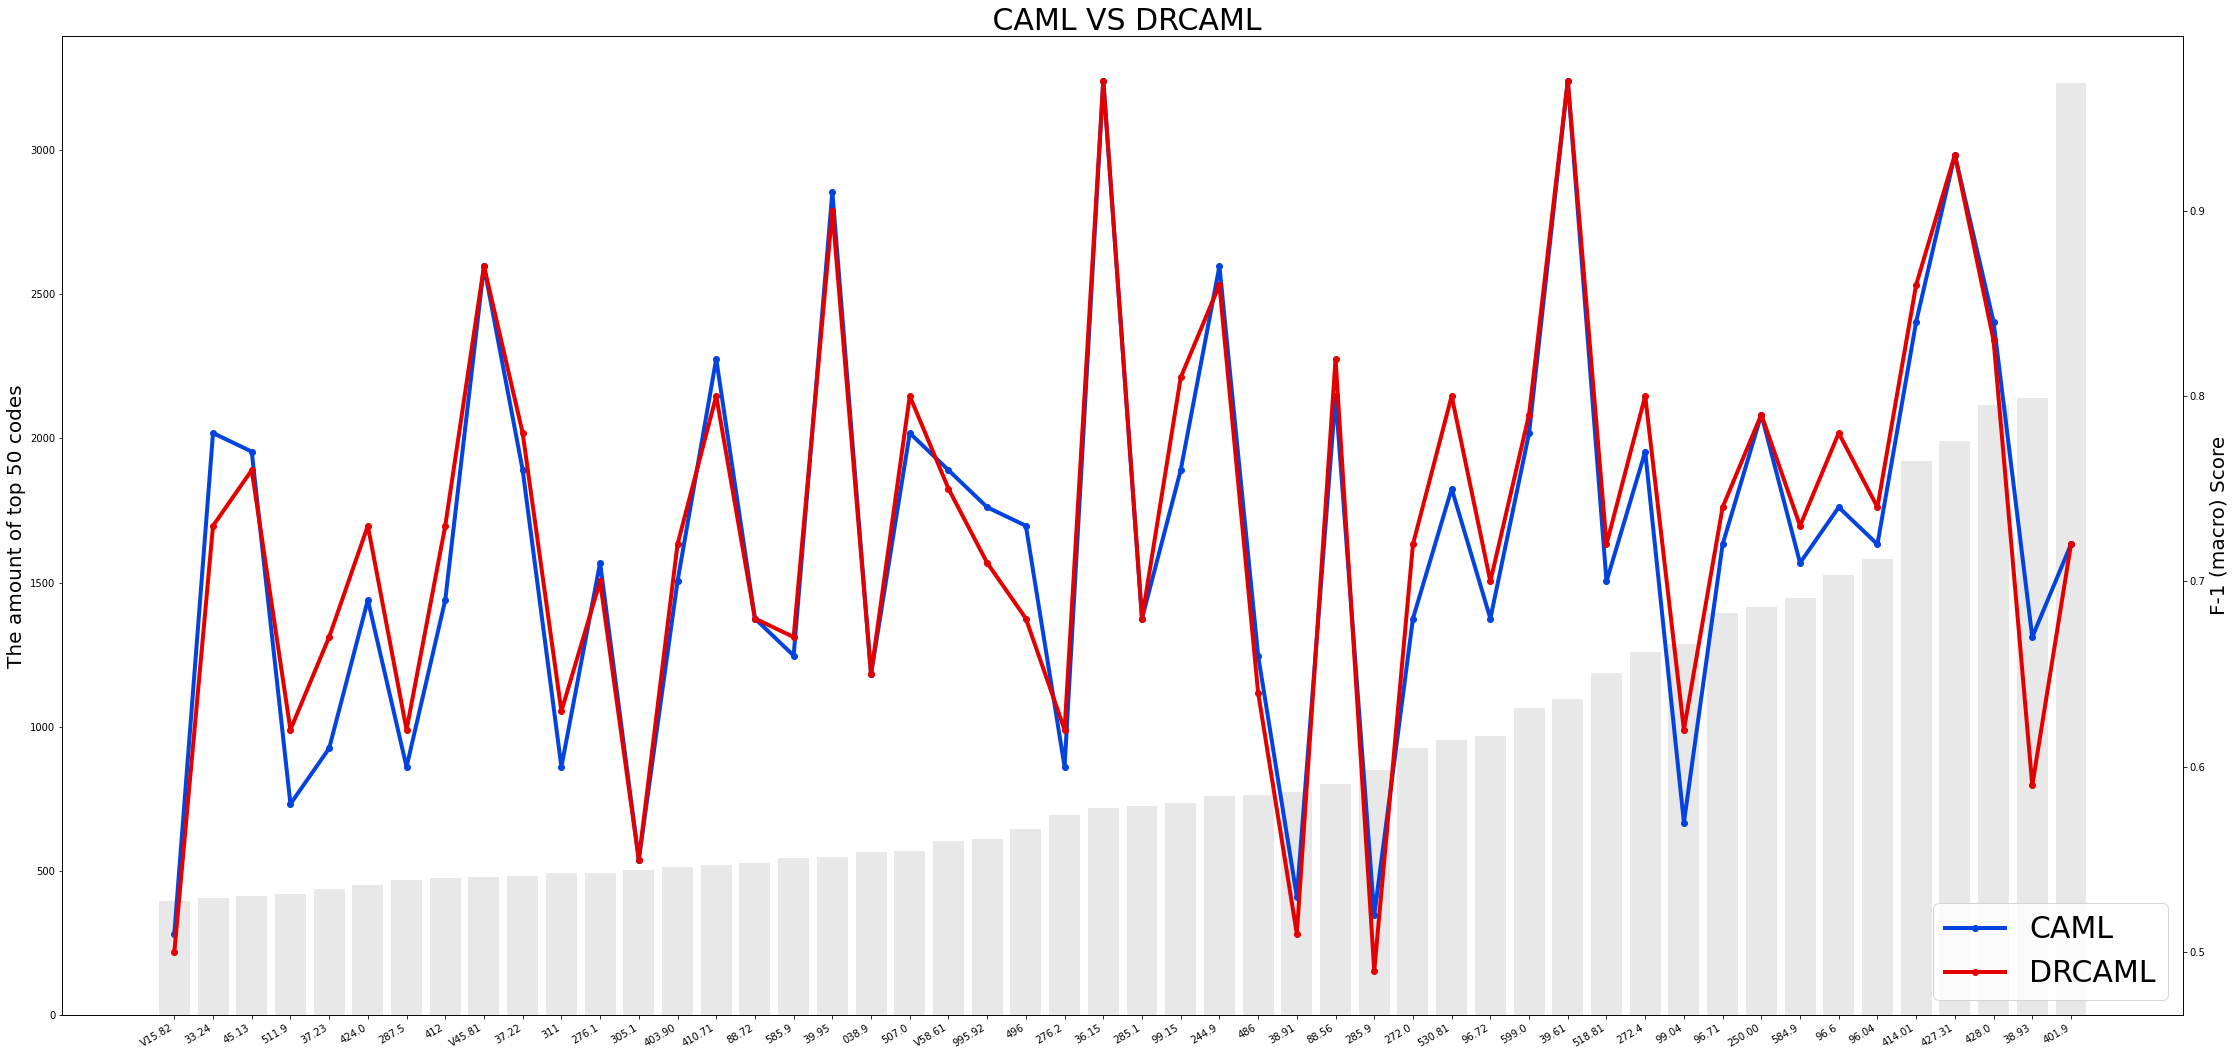

In [ ]:
### 先单独 比较 CAML 和 DRCAML
############# 开始作图 ######################
fig,ax1 = plt.subplots(figsize=(38, 20))
ax2 = ax1.twinx()           # 做镜像处理

# 柱形图,数量
ax1.bar(x,
        bert_support,
        color='lightgrey',
        alpha=0.5)
ax1.set_ylabel("The amount of top 50 codes",fontsize=20)
ax1.set_title(" CAML VS DRCAML",fontsize=30)

# 折线图，F1
ax2.plot(x,
         caml_f1_macro,
         'o-',
         #linestyle=":",
         linewidth=4,
         color = '#0343df',
         label = 'CAML')
ax2.plot(x,
         drcaml_f1_macro,
         'o-',
         #linestyle=":",
         linewidth=4,         
         color = '#e50000',
         label = 'DRCAML')


ax2.set_ylabel("F-1 (macro) Score",fontsize=20)
ax2.legend(loc='lower right',fontsize=30)

fig.autofmt_xdate()
plt.show()  
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/f1_caml_drcaml.png")

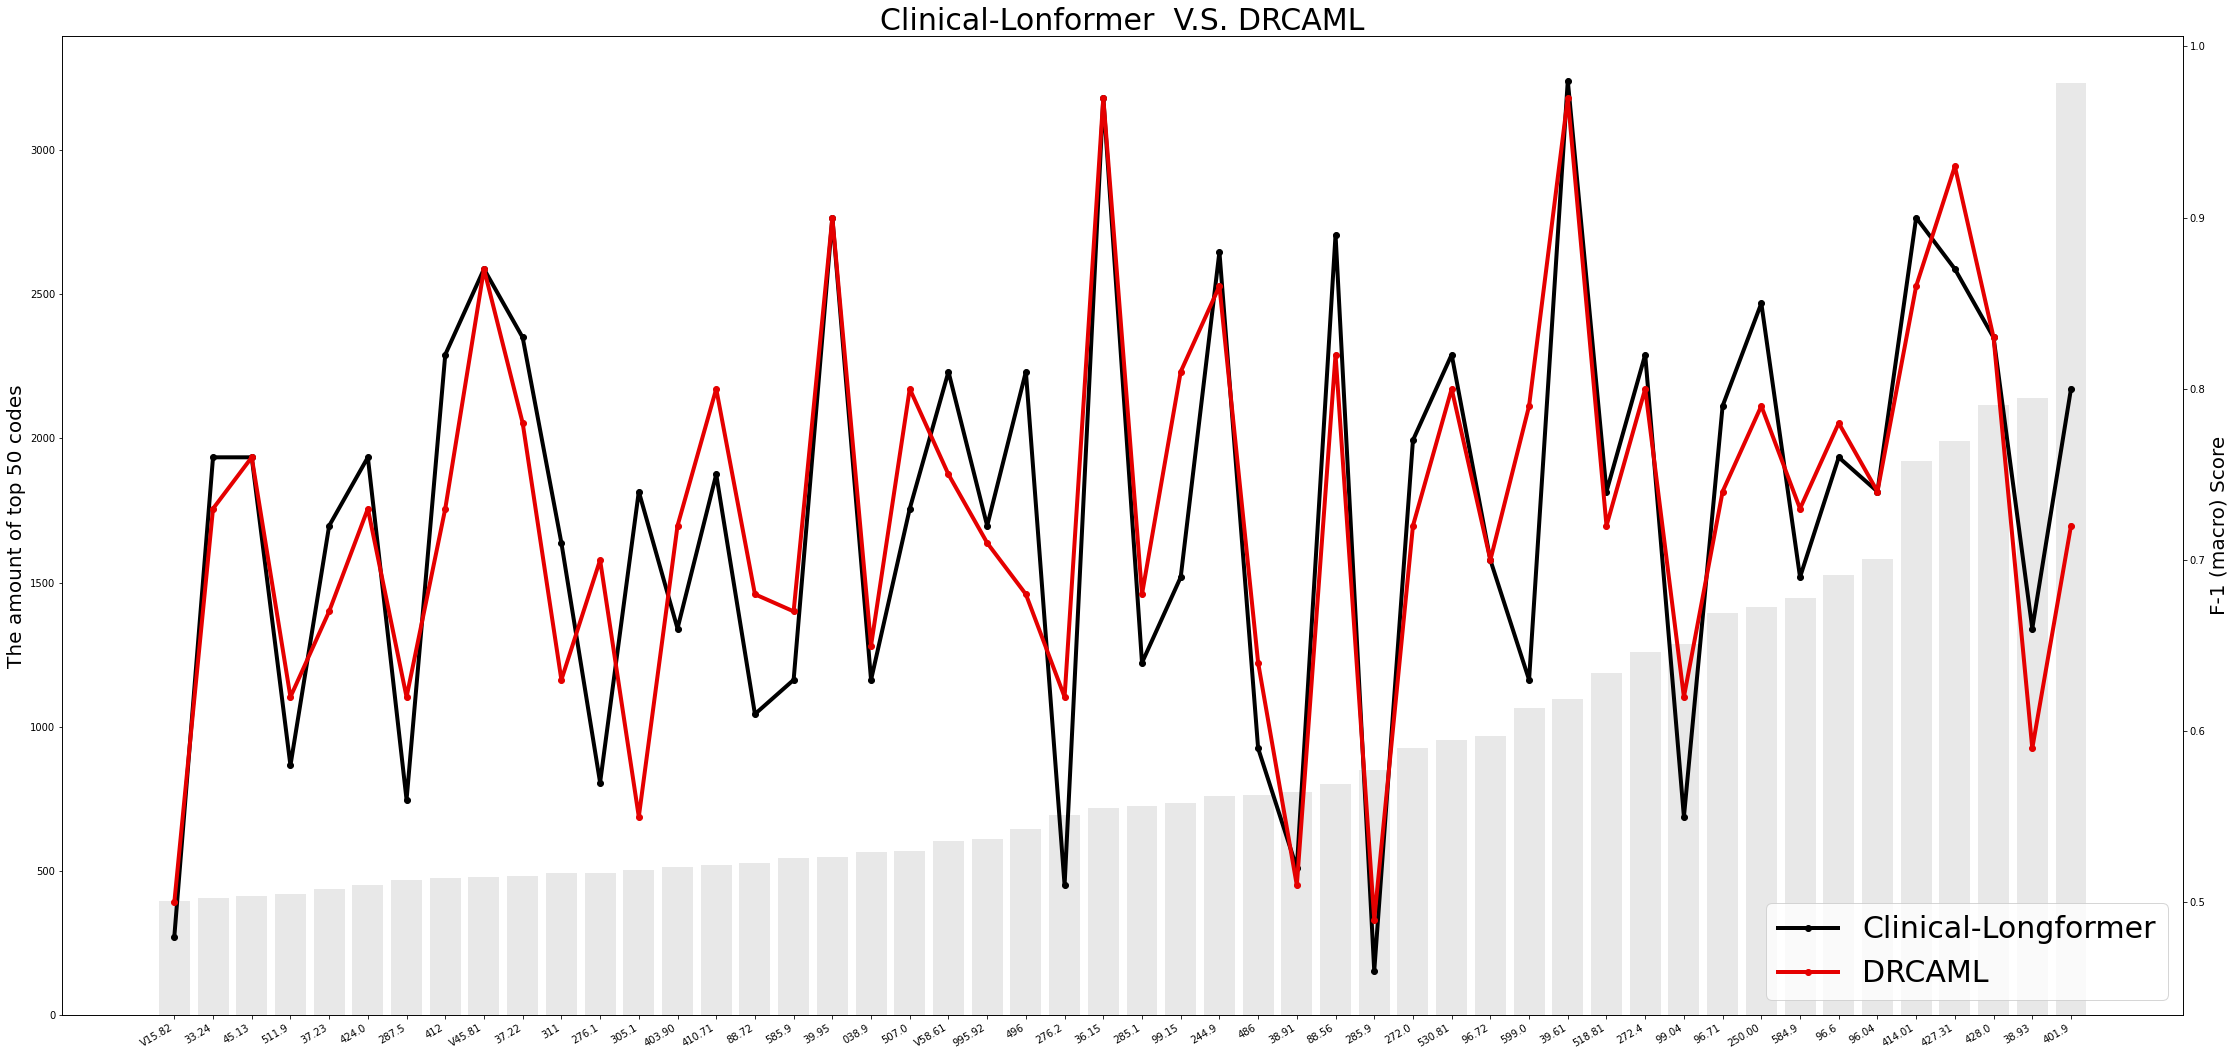

In [ ]:
# 比较三个 transformer-model 的表现
# 画出 数量 + F-1 （macro）的综合图表
x = bert_perform_dict['label_name']
bert_support = bert_perform_dict['support']
bert_f1_macro = bert_perform_dict['macro_f1']

clinical_support = clinical_perform_dict['support']
clinical_f1_macro = clinical_perform_dict['macro_f1']

clinicallong_support = clinicallong_perform_dict['support']
clinicallong_f1_macro = clinicallong_perform_dict['macro_f1']

caml_support = caml_perform_dict['support']
caml_f1_macro = caml_perform_dict['macro_f1']

drcaml_support = drcaml_perform_dict['support']
drcaml_f1_macro = drcaml_perform_dict['macro_f1']


############# 开始作图 ######################
fig,ax1 = plt.subplots(figsize=(38, 20))
ax2 = ax1.twinx()           # 做镜像处理

# 柱形图,数量
ax1.bar(x,
        bert_support,
        color='lightgrey',
        alpha = 0.5)
ax1.set_ylabel("The amount of top 50 codes",fontsize=20)
ax1.set_title("Clinical-Lonformer  V.S. DRCAML",fontsize=30)

# 折线图，F1
ax2.plot(x,
         clinicallong_f1_macro,
         'o-',
         #linestyle=":",
         linewidth=4,
         color='#000000', # "deeppink" 红，"#2ca02c"绿,'#9a0eea'紫 ,'#f97306'橙
         label = 'Clinical-Longformer')
ax2.plot(x,
         drcaml_f1_macro,
         'o-',
         #linestyle=":",
         linewidth=4,         
         color = '#e50000',
         label = 'DRCAML')

ax2.set_ylabel("F-1 (macro) Score",fontsize=20)
ax2.legend(loc='lower right',fontsize=30)

fig.autofmt_xdate()
plt.show()  
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/f1_dis_caml_clinicallong.png")

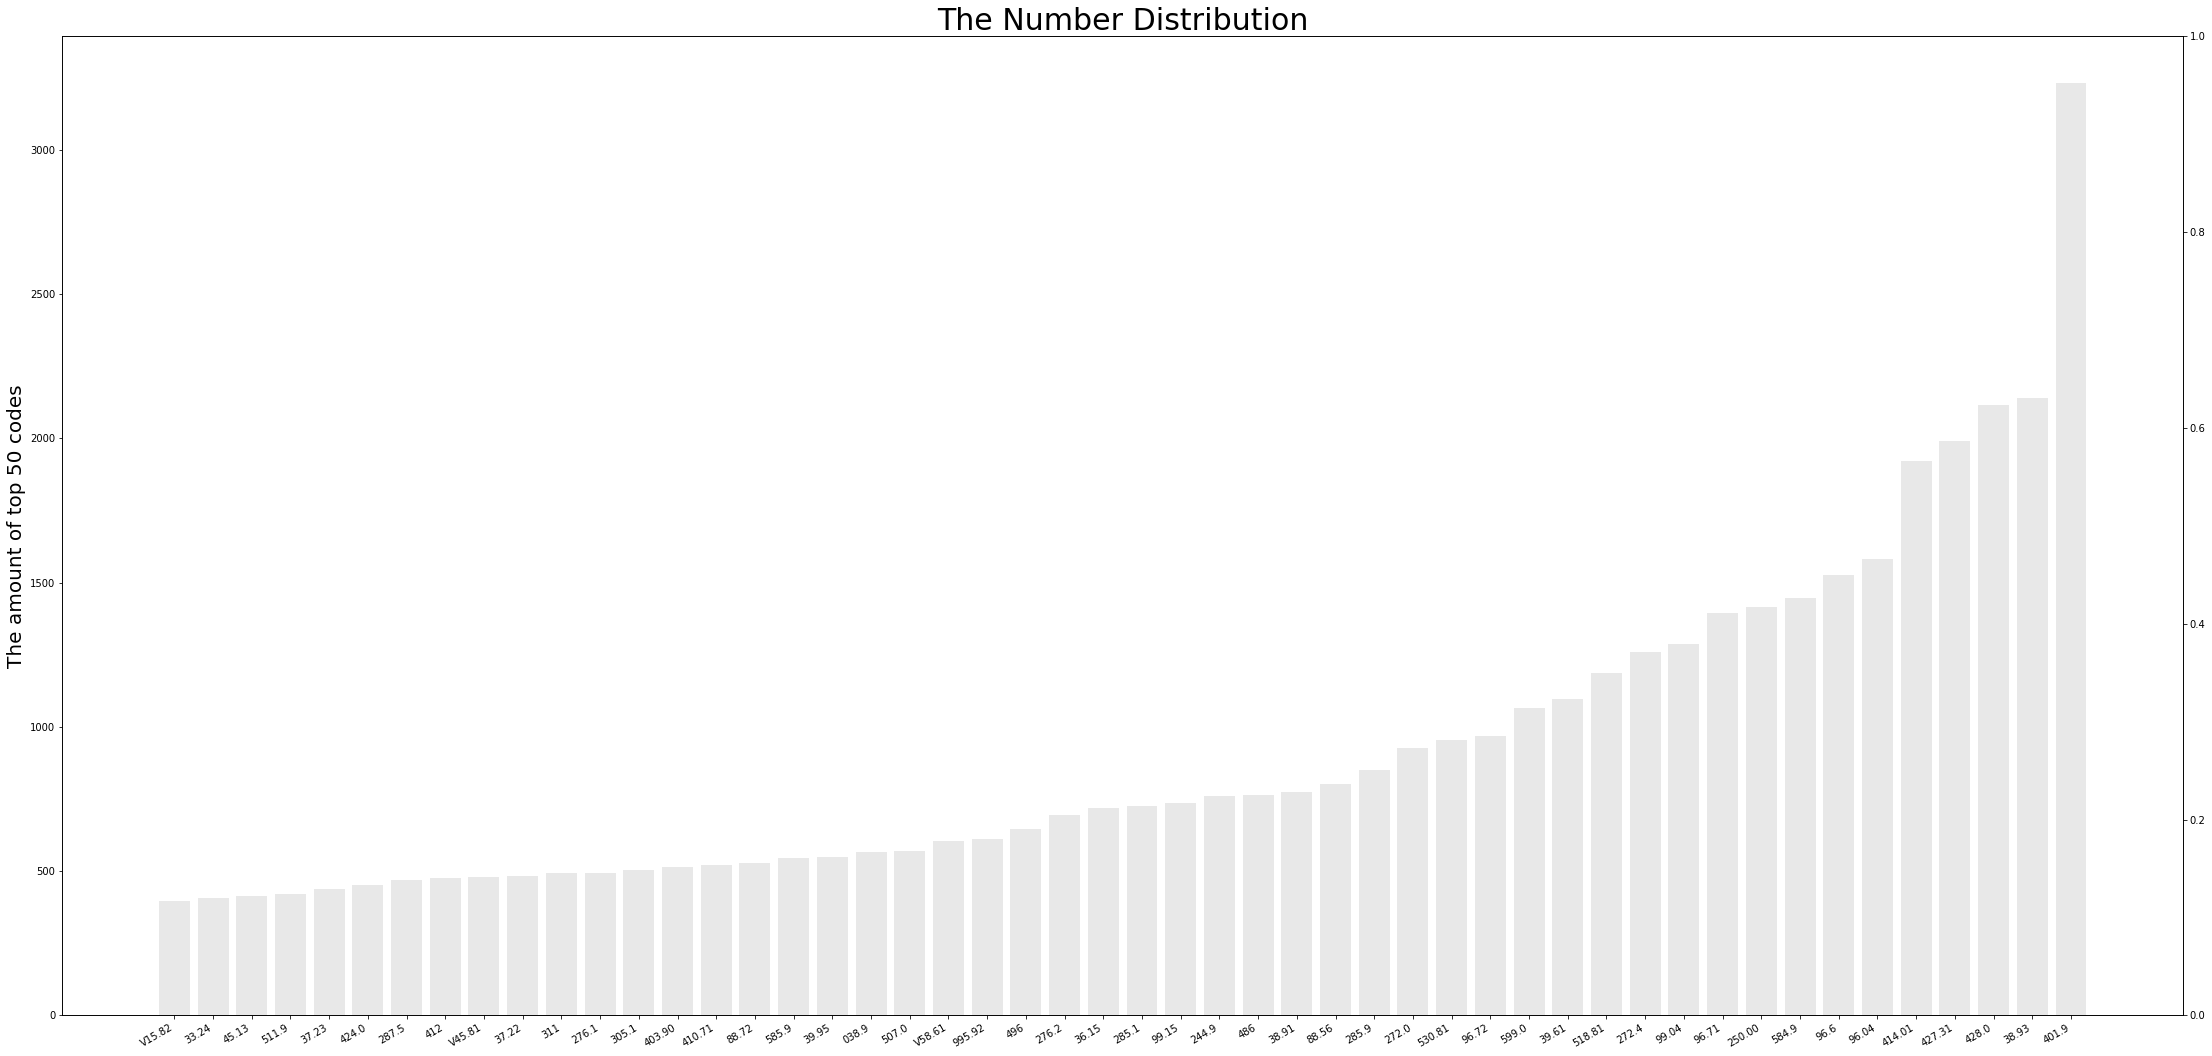

In [ ]:
# 画出 数量 + F-1 （class1）的综合图表
x = caml_perform_dict['label_name']
bert_support = caml_perform_dict['support']
bert_f1_class1 = bert_perform_dict['class1_f1']

fig,ax1 = plt.subplots(figsize=(38, 20))
ax2 = ax1.twinx()           # 做镜像处理

# 柱形图,数量
ax1.bar(x,
        caml_perform_dict['support'],
        color='lightgrey',
        alpha=0.5)
ax1.set_ylabel("The amount of top 50 codes",fontsize=20)
ax1.set_title("The Number Distribution",fontsize=30)
fig.autofmt_xdate()
plt.show()  
fig.savefig("/content/drive/My Drive/MIMIC/BERT_FineTune/visualization/top50_dis.png")

# Check

In [ ]:
# load raw data
train_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50.csv')
test_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50.csv')
val_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50.csv')

# 首先收集所有的 top 50 的标签，做成列表
top_50_list = []
top_50_code = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/TOP_50_CODES.csv',header=None)
idx2code = {0: '038.9', 1: '244.9', 2: '250.00', 3: '272.0', 4: '272.4', 5: '276.1', 6: '276.2', 7: '285.1', 8: '285.9', 9: '287.5', 10: '305.1', 11: '311', 12: '33.24', 13: '36.15', 14: '37.22', 15: '37.23', 16: '38.91', 17: '38.93', 18: '39.61', 19: '39.95', 20: '401.9', 
            21: '403.90', 22: '410.71', 23: '412', 24: '414.01', 25: '424.0', 26: '427.31', 27: '428.0', 28: '45.13', 29: '486', 30: '496', 31: '507.0', 32: '511.9', 33: '518.81', 34: '530.81', 35: '584.9', 36: '585.9', 37: '599.0', 38: '88.56', 39: '88.72', 40: '96.04', 
            41: '96.6', 42: '96.71', 43: '96.72', 44: '99.04', 45: '99.15', 46: '995.92', 47: 'V15.82', 48: 'V45.81', 49: 'V58.61'}
for index in range(len(top_50_code[0])):
  #raw_info = top_50_code.iloc[index]
  #top_50_list.append(raw_info[0])
  top_50_list.append(idx2code[index])

# 讲一条病人的数据，转化为向量
def data_2_label(data_text,top_50_list):
  label = []
  labels = data_text.split(';')
  for element in top_50_list:
    if element in labels:
      label.append(1)
    else:
      label.append(0)
  return label
'''
# 制作训练集
train_data_list = []
for index in range(len(train_data['LABELS'])):
  row_info = train_data.iloc[index]
  text = row_info[2]
  labels = data_2_label(row_info[3],top_50_list)
  train_data_list.append([text,labels])
  
train_data_df = pd.DataFrame(train_data_list)
train_data_df.columns = ["text", "labels"]
'''
# 制作验证集
val_data_list = []
for index in range(len(val_data['LABELS'])):
  row_info = val_data.iloc[index]
  text = row_info[2]
  labels = data_2_label(row_info[3],top_50_list)
  val_data_list.append([row_info[1],text,labels])
  
val_data_df = pd.DataFrame(val_data_list)
val_data_df.columns = ['hadm',"text", "labels"]
'''
# 制作测试集
test_data_list = []
for index in range(len(test_data['LABELS'])):
  row_info = test_data.iloc[index]
  text = row_info[2]
  labels = data_2_label(row_info[3],top_50_list)
  test_data_list.append([text,labels])
  
test_data_df = pd.DataFrame(test_data_list)
test_data_df.columns = ["text", "labels"]
'''


'\n# 制作测试集\ntest_data_list = []\nfor index in range(len(test_data[\'LABELS\'])):\n  row_info = train_data.iloc[index]\n  text = row_info[2]\n  labels = data_2_label(row_info[3],top_50_list)\n  test_data_list.append([text,labels])\n  \ntest_data_df = pd.DataFrame(test_data_list)\ntest_data_df.columns = ["text", "labels"]\n'

In [ ]:
val_data[:5]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,86006,111912,admission date discharge date date of birth se...,V58.61;401.9;96.71;427.31;414.01,230
1,85950,189769,admission date discharge date service neurosur...,403.90;585.9;250.00;V45.81;96.71,304
2,88025,180431,admission date discharge date date of birth se...,96.71;38.93;518.81,359
3,83776,152868,admission date discharge date date of birth se...,401.9;96.71;518.81;272.4,408
4,85055,169373,admission date discharge date date of birth se...,99.04;96.71,409


In [ ]:
for index in range(len(val_data['LABELS'])):
  row_info = val_data.iloc[index]
  if row_info[1] == 189769:
    text = row_info[2]
    labels = data_2_label(row_info[3],top_50_list)
    print(row_info[0])
    print(row_info[1])
    print(text)
    print(labels)

85950
189769
admission date discharge date service neurosurgery allergies sulfa sulfonamides attending first name3 lf chief complaint cc cc contact info major surgical or invasive procedure none history of present illness hpi 88m who lives with family had fall yesterday today had decline in mental status ems called pt was unresponsive on arrival went to osh head ct showed large r sdh pt was intubated at osh and transferred to hospital1 for further care past medical history cad s p mi in s p cabg in ventricular aneurysm at that time cath in with occluded rca unable to intervene chf reported ef 1st degree avb and lbbb dm type ii cri baseline cr s p splenectomy gerd s p ccy s p turp social history lives with daughter in law and son quit tobacco many years ago family history noncontributory physical exam physical exam o t bp hr r o2sats98 thin frail elderly man intubated in hard collar excamined heent pupils r 6mm nonreac l 3mm trace reac neck in hard collar obvious pacer in l chest ext op

In [ ]:
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
caml_val_targets[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

In [ ]:
bert_val_targets[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
sum_bert = 0
for index in range(len(bert_val_targets)):
  sum_bert += bert_val_targets[index,0]
sum_bert

71.0

In [ ]:
caml_bert = 0
for index in range(len(caml_val_targets)):
  caml_bert += caml_val_targets[index,1]
caml_bert

180.0